# Index Tracking Portfolio and Forward Testing (S&P 500)

## Web Scraping & Data Wrangling

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

comp = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]
comp.head()

Symbol             Security SEC filings             GICS Sector  \
0    MMM                   3M     reports             Industrials   
1    ABT  Abbott Laboratories     reports             Health Care   
2   ABBV               AbbVie     reports             Health Care   
3   ABMD              Abiomed     reports             Health Care   
4    ACN            Accenture     reports  Information Technology   

                GICS Sub-Industry    Headquarters Location Date first added  \
0        Industrial Conglomerates    Saint Paul, Minnesota       1976-08-09   
1           Health Care Equipment  North Chicago, Illinois       1964-03-31   
2                 Pharmaceuticals  North Chicago, Illinois       2012-12-31   
3           Health Care Equipment   Danvers, Massachusetts       2018-05-31   
4  IT Consulting & Other Services          Dublin, Ireland       2011-07-06   

       CIK      Founded  
0    66740         1902  
1     1800         1888  
2  1551152  2013 (1888)  
3   815094         1981  
4  1467373         1989

In [3]:
comp = comp.iloc[:, [0,1,3,6]]
comp


Symbol             Security             GICS Sector Date first added
0      MMM                   3M             Industrials       1976-08-09
1      ABT  Abbott Laboratories             Health Care       1964-03-31
2     ABBV               AbbVie             Health Care       2012-12-31
3     ABMD              Abiomed             Health Care       2018-05-31
4      ACN            Accenture  Information Technology       2011-07-06
..     ...                  ...                     ...              ...
500    YUM          Yum! Brands  Consumer Discretionary       1997-10-06
501   ZBRA   Zebra Technologies  Information Technology       2019-12-23
502    ZBH        Zimmer Biomet             Health Care       2001-08-07
503   ZION        Zions Bancorp              Financials       2001-06-22
504    ZTS               Zoetis             Health Care       2013-06-21

[505 rows x 4 columns]

In [4]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Symbol            505 non-null    object
 1   Security          505 non-null    object
 2   GICS Sector       505 non-null    object
 3   Date first added  457 non-null    object
dtypes: object(4)
memory usage: 15.9+ KB


### Data Cleaning

In [5]:
import unicodedata
comp['Symbol'] = comp['Symbol'].apply(lambda x: unicodedata.normalize('NFKD', x))
comp['Symbol']

0       MMM
1       ABT
2      ABBV
3      ABMD
4       ACN
       ... 
500     YUM
501    ZBRA
502     ZBH
503    ZION
504     ZTS
Name: Symbol, Length: 505, dtype: object

#### Convert columns to the correct type

In [6]:
comp['Symbol'] = comp['Symbol'].astype('str')
comp['Security'] = comp['Security'].astype('str')
comp['GICS Sector'] = comp['GICS Sector'].astype('str')

In [7]:
comp['Symbol']

0       MMM
1       ABT
2      ABBV
3      ABMD
4       ACN
       ... 
500     YUM
501    ZBRA
502     ZBH
503    ZION
504     ZTS
Name: Symbol, Length: 505, dtype: object

In [8]:
#comp['Date first added'] = pd.to_datetime(comp['Date first added'])      It gives error

In [9]:
comp[comp['Date first added'] == '1983-11-30 (1957-03-04)']


Symbol Security             GICS Sector         Date first added
51      T     AT&T  Communication Services  1983-11-30 (1957-03-04)

In [10]:
comp.loc[51, 'Date first added'] = '1957-03-04'

In [11]:
comp['Date first added'] = pd.to_datetime(comp['Date first added'])

In [12]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Symbol            505 non-null    object        
 1   Security          505 non-null    object        
 2   GICS Sector       505 non-null    object        
 3   Date first added  457 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 15.9+ KB


In [13]:
nan_comp = comp[comp.isna().any(axis = 1)]
nan_comp

Symbol                  Security             GICS Sector Date first added
7      AMD    Advanced Micro Devices  Information Technology              NaT
125     ED       Consolidated Edison               Utilities              NaT
129    GLW                   Corning  Information Technology              NaT
138    DHR                   Danaher             Health Care              NaT
139    DRI        Darden Restaurants  Consumer Discretionary              NaT
154      D           Dominion Energy               Utilities              NaT
164    ETN         Eaton Corporation             Industrials              NaT
181     ES         Eversource Energy               Utilities              NaT
193   FITB       Fifth Third Bancorp              Financials              NaT
194     FE               FirstEnergy               Utilities              NaT
205    BEN        Franklin Resources              Financials              NaT
206    FCX          Freeport-McMoRan               Materials              NaT
212     GE          General Electric             Industrials              NaT
239    HUM                    Humana             Health Care              NaT
240   HBAN     Huntington Bancshares              Financials              NaT
276   KLAC           KLA Corporation  Information Technology              NaT
293      L         Loews Corporation              Financials              NaT
301    MAR    Marriott International  Consumer Discretionary              NaT
309    MCK      McKesson Corporation             Health Care              NaT
313    MET                   MetLife              Financials              NaT
326    MCO                   Moody's              Financials              NaT
327     MS            Morgan Stanley              Financials              NaT
329    MSI        Motorola Solutions  Information Technology              NaT
341     NI                  NiSource               Utilities              NaT
343   NTRS            Northern Trust              Financials              NaT
355    OMC             Omnicom Group  Communication Services              NaT
363   PAYX                   Paychex  Information Technology              NaT
374    PNW     Pinnacle West Capital               Utilities              NaT
379    PPL                       PPL               Utilities              NaT
392   QCOM                  Qualcomm  Information Technology              NaT
396    RTX     Raytheon Technologies             Industrials              NaT
404    ROK       Rockwell Automation             Industrials              NaT
409   SPGI                S&P Global              Financials              NaT
415    SRE             Sempra Energy               Utilities              NaT
424   SBUX                 Starbucks  Consumer Discretionary              NaT
425    STT  State Street Corporation              Financials              NaT
433   TROW             T. Rowe Price              Financials              NaT
435    TPR                  Tapestry  Consumer Discretionary              NaT
442    TXN         Texas Instruments  Information Technology              NaT
457    USB              U.S. Bancorp              Financials              NaT
466    VLO             Valero Energy                  Energy              NaT
473   VIAC                 ViacomCBS  Communication Services              NaT
476    VNO      Vornado Realty Trust             Real Estate              NaT
483     WM          Waste Management             Industrials              NaT
484    WAT        Waters Corporation             Health Care              NaT
491    WRK                  WestRock               Materials              NaT
492     WY              Weyerhaeuser             Real Estate              NaT
493    WHR     Whirlpool Corporation  Consumer Discretionary              NaT

In [14]:
comp = comp.rename(columns = {'Security':'Company', 'GICS Sector':'Industry', 'Date first added':'Date Added'})
comp

Symbol              Company                Industry Date Added
0      MMM                   3M             Industrials 1976-08-09
1      ABT  Abbott Laboratories             Health Care 1964-03-31
2     ABBV               AbbVie             Health Care 2012-12-31
3     ABMD              Abiomed             Health Care 2018-05-31
4      ACN            Accenture  Information Technology 2011-07-06
..     ...                  ...                     ...        ...
500    YUM          Yum! Brands  Consumer Discretionary 1997-10-06
501   ZBRA   Zebra Technologies  Information Technology 2019-12-23
502    ZBH        Zimmer Biomet             Health Care 2001-08-07
503   ZION        Zions Bancorp              Financials 2001-06-22
504    ZTS               Zoetis             Health Care 2013-06-21

[505 rows x 4 columns]

In [15]:
 comp.loc[comp['Date Added'] > '2017-06-01']


Symbol                       Company                Industry Date Added
3     ABMD                       Abiomed             Health Care 2018-05-31
17    ALGN              Align Technology             Health Care 2017-06-19
25    AMCR                         Amcor               Materials 2019-06-07
39    ANSS                         Ansys  Information Technology 2017-06-19
42     AOS                   A. O. Smith             Industrials 2017-07-26
..     ...                           ...                     ...        ...
453    TYL            Tyler Technologies  Information Technology 2020-06-22
478    WRB     W. R. Berkley Corporation              Financials 2019-12-05
479    WAB                        Wabtec             Industrials 2019-02-27
488    WST  West Pharmaceutical Services             Health Care 2020-05-22
501   ZBRA            Zebra Technologies  Information Technology 2019-12-23

[85 rows x 4 columns]

In [16]:
comp = comp[~(comp['Date Added'] >'2019-06-01')]
comp

Symbol              Company                Industry Date Added
0      MMM                   3M             Industrials 1976-08-09
1      ABT  Abbott Laboratories             Health Care 1964-03-31
2     ABBV               AbbVie             Health Care 2012-12-31
3     ABMD              Abiomed             Health Care 2018-05-31
4      ACN            Accenture  Information Technology 2011-07-06
..     ...                  ...                     ...        ...
499    XYL                Xylem             Industrials 2011-11-01
500    YUM          Yum! Brands  Consumer Discretionary 1997-10-06
502    ZBH        Zimmer Biomet             Health Care 2001-08-07
503   ZION        Zions Bancorp              Financials 2001-06-22
504    ZTS               Zoetis             Health Care 2013-06-21

[460 rows x 4 columns]

In [17]:
comp.to_csv('comp.csv', index = False)

comp = pd.read_csv('comp.csv')
comp

Symbol              Company                Industry  Date Added
0      MMM                   3M             Industrials  1976-08-09
1      ABT  Abbott Laboratories             Health Care  1964-03-31
2     ABBV               AbbVie             Health Care  2012-12-31
3     ABMD              Abiomed             Health Care  2018-05-31
4      ACN            Accenture  Information Technology  2011-07-06
..     ...                  ...                     ...         ...
455    XYL                Xylem             Industrials  2011-11-01
456    YUM          Yum! Brands  Consumer Discretionary  1997-10-06
457    ZBH        Zimmer Biomet             Health Care  2001-08-07
458   ZION        Zions Bancorp              Financials  2001-06-22
459    ZTS               Zoetis             Health Care  2013-06-21

[460 rows x 4 columns]

In [18]:
comp['Symbol']

0       MMM
1       ABT
2      ABBV
3      ABMD
4       ACN
       ... 
455     XYL
456     YUM
457     ZBH
458    ZION
459     ZTS
Name: Symbol, Length: 460, dtype: object

In [19]:
tickers = comp['Symbol'].to_list()
tickers

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CE',
 'CNC',
 'CNP',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'COO',
 'CPRT',
 'GLW',
 'COST',
 'CTRA'

In [20]:
import yfinance as yf
GSPC = yf.download('^GSPC', start = '2017-01-01', end = '2020-01-01')
GSPC

[*********************100%***********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-01-03  2251.570068  2263.879883  2245.129883  2257.830078  2257.830078   
2017-01-04  2261.600098  2272.820068  2261.600098  2270.750000  2270.750000   
2017-01-05  2268.179932  2271.500000  2260.449951  2269.000000  2269.000000   
2017-01-06  2271.139893  2282.100098  2264.060059  2276.979980  2276.979980   
2017-01-09  2273.590088  2275.489990  2268.899902  2268.899902  2268.899902   
...                 ...          ...          ...          ...          ...   
2019-12-24  3225.449951  3226.429932  3220.510010  3223.379883  3223.379883   
2019-12-26  3227.199951  3240.080078  3227.199951  3239.909912  3239.909912   
2019-12-27  3247.229980  3247.929932  3234.370117  3240.020020  3240.020020   
2019-12-30  3240.090088  3240.919922  3216.570068  3221.290039  3221.290039   
2019-12-31  3215.179932  3231.719971  3212.030029  3230.780029  3230.780029   

                Volume  
Date                    
2017-01-03  3770530000  
2017-01-04  3764890000  
2017-01-05  3761820000  
2017-01-06  3339890000  
2017-01-09  3217610000  
...                ...  
2019-12-24  1296540000  
2019-12-26  2160680000  
2019-12-27  2428670000  
2019-12-30  3013290000  
2019-12-31  2893810000  

[754 rows x 6 columns]

In [21]:
GSPC.to_csv('GSPC.csv')
GSPC = pd.read_csv('GSPC', parse_dates = ['Date'], index_col = 'Date')
GSPC

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-01-03  2251.570068  2263.879883  2245.129883  2257.830078  2257.830078   
2017-01-04  2261.600098  2272.820068  2261.600098  2270.750000  2270.750000   
2017-01-05  2268.179932  2271.500000  2260.449951  2269.000000  2269.000000   
2017-01-06  2271.139893  2282.100098  2264.060059  2276.979980  2276.979980   
2017-01-09  2273.590088  2275.489990  2268.899902  2268.899902  2268.899902   
...                 ...          ...          ...          ...          ...   
2019-12-24  3225.449951  3226.429932  3220.510010  3223.379883  3223.379883   
2019-12-26  3227.199951  3240.080078  3227.199951  3239.909912  3239.909912   
2019-12-27  3247.229980  3247.929932  3234.370117  3240.020020  3240.020020   
2019-12-30  3240.090088  3240.919922  3216.570068  3221.290039  3221.290039   
2019-12-31  3215.179932  3231.719971  3212.030029  3230.780029  3230.780029   

                Volume  
Date                    
2017-01-03  3770530000  
2017-01-04  3764890000  
2017-01-05  3761820000  
2017-01-06  3339890000  
2017-01-09  3217610000  
...                ...  
2019-12-24  1296540000  
2019-12-26  2160680000  
2019-12-27  2428670000  
2019-12-30  3013290000  
2019-12-31  2893810000  

[754 rows x 6 columns]

In [22]:
stock_prices = yf.download(tickers = tickers, start = '2017-01-01', end = '2020-01-01', groupby = 'Symbol')['Close']
stock_prices

[*********************100%***********************]  460 of 460 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


A        AAL         AAP       AAPL       ABBV        ABC  \
Date                                                                            
2017-01-03  46.490002  46.299999  170.600006  29.037500  62.410000  82.610001   
2017-01-04  47.099998  46.700001  172.000000  29.004999  63.290001  84.660004   
2017-01-05  46.540001  45.889999  171.880005  29.152500  63.770000  83.680000   
2017-01-06  47.990002  46.209999  169.630005  29.477501  63.790001  84.800003   
2017-01-09  48.139999  47.080002  169.529999  29.747499  64.209999  85.480003   
...               ...        ...         ...        ...        ...        ...   
2019-12-24  85.300003  29.180000  160.570007  71.067497  89.849998  85.419998   
2019-12-26  85.449997  29.670000  159.270004  72.477501  89.830002  85.050003   
2019-12-27  85.419998  28.440001  158.350006  72.449997  89.199997  84.910004   
2019-12-30  84.900002  28.299999  159.119995  72.879997  88.519997  83.639999   
2019-12-31  85.309998  28.680000  160.160004  73.412498  88.540001  85.019997   

                  ABMD        ABT         ACN        ADBE  ...        WYNN  \
Date                                                       ...               
2017-01-03  112.360001  39.049999  116.459999  103.480003  ...   87.459999   
2017-01-04  115.739998  39.360001  116.739998  104.139999  ...   90.279999   
2017-01-05  114.809998  39.700001  114.989998  105.910004  ...   91.440002   
2017-01-06  115.419998  40.779999  116.300003  108.300003  ...   92.430000   
2017-01-09  117.110001  40.740002  115.000000  108.570000  ...   92.750000   
...                ...        ...         ...         ...  ...         ...   
2019-12-24  172.300003  87.279999  211.610001  329.640015  ...  139.440002   
2019-12-26  171.009995  87.279999  212.050003  331.200012  ...  140.940002   
2019-12-27  169.270004  87.400002  212.220001  330.790009  ...  139.809998   
2019-12-30  167.289993  86.800003  210.639999  328.339996  ...  139.380005   
2019-12-31  170.589996  86.860001  210.570007  329.809998  ...  138.869995   

                  XEL       XLNX        XOM       XRAY        XYL         YUM  \
Date                                                                            
2017-01-03  40.619999  59.070000  90.889999  58.619999  49.650002   63.209999   
2017-01-04  40.799999  58.639999  89.889999  59.099998  50.389999   63.439999   
2017-01-05  40.799999  57.930000  88.550003  58.330002  49.930000   63.650002   
2017-01-06  40.919998  59.049999  88.500000  58.290001  49.580002   64.419998   
2017-01-09  40.299999  59.060001  87.040001  58.470001  49.369999   64.599998   
...               ...        ...        ...        ...        ...         ...   
2019-12-24  62.860001  98.489998  70.019997  57.209999  78.639999  100.330002   
2019-12-26  62.790001  98.680000  70.129997  56.529999  78.599998  101.790001   
2019-12-27  63.119999  98.419998  69.889999  56.840000  78.839996  101.900002   
2019-12-30  63.290001  97.680000  69.480003  56.400002  78.739998  100.639999   
2019-12-31  63.490002  97.769997  69.779999  56.590000  78.790001  100.730003   

                   ZBH       ZION         ZTS  
Date                                           
2017-01-03  103.330002  43.180000   53.590000  
2017-01-04  104.279999  43.799999   54.110001  
2017-01-05  104.949997  43.090000   53.930000  
2017-01-06  104.959999  43.369999   54.099998  
2017-01-09  107.000000  42.900002   53.950001  
...                ...        ...         ...  
2019-12-24  150.869995  51.529999  132.919998  
2019-12-26  150.300003  51.660000  133.029999  
2019-12-27  150.009995  51.500000  133.250000  
2019-12-30  148.750000  51.770000  132.210007  
2019-12-31  149.679993  51.919998  132.350006  

[754 rows x 460 columns]

In [23]:
stock_prices = stock_prices.dropna(how = 'all')   
stock_prices = stock_prices.drop(columns = ['BF.B', 'BRK.B'])
stock_prices.to_csv('prices.csv')

In [24]:
prices = pd.read_csv('prices.csv', parse_dates = ['Date'], index_col = 'Date')
prices

A        AAL         AAP       AAPL       ABBV        ABC  \
Date                                                                            
2017-01-03  46.490002  46.299999  170.600006  29.037500  62.410000  82.610001   
2017-01-04  47.099998  46.700001  172.000000  29.004999  63.290001  84.660004   
2017-01-05  46.540001  45.889999  171.880005  29.152500  63.770000  83.680000   
2017-01-06  47.990002  46.209999  169.630005  29.477501  63.790001  84.800003   
2017-01-09  48.139999  47.080002  169.529999  29.747499  64.209999  85.480003   
...               ...        ...         ...        ...        ...        ...   
2019-12-24  85.300003  29.180000  160.570007  71.067497  89.849998  85.419998   
2019-12-26  85.449997  29.670000  159.270004  72.477501  89.830002  85.050003   
2019-12-27  85.419998  28.440001  158.350006  72.449997  89.199997  84.910004   
2019-12-30  84.900002  28.299999  159.119995  72.879997  88.519997  83.639999   
2019-12-31  85.309998  28.680000  160.160004  73.412498  88.540001  85.019997   

                  ABMD        ABT         ACN        ADBE  ...        WYNN  \
Date                                                       ...               
2017-01-03  112.360001  39.049999  116.459999  103.480003  ...   87.459999   
2017-01-04  115.739998  39.360001  116.739998  104.139999  ...   90.279999   
2017-01-05  114.809998  39.700001  114.989998  105.910004  ...   91.440002   
2017-01-06  115.419998  40.779999  116.300003  108.300003  ...   92.430000   
2017-01-09  117.110001  40.740002  115.000000  108.570000  ...   92.750000   
...                ...        ...         ...         ...  ...         ...   
2019-12-24  172.300003  87.279999  211.610001  329.640015  ...  139.440002   
2019-12-26  171.009995  87.279999  212.050003  331.200012  ...  140.940002   
2019-12-27  169.270004  87.400002  212.220001  330.790009  ...  139.809998   
2019-12-30  167.289993  86.800003  210.639999  328.339996  ...  139.380005   
2019-12-31  170.589996  86.860001  210.570007  329.809998  ...  138.869995   

                  XEL       XLNX        XOM       XRAY        XYL         YUM  \
Date                                                                            
2017-01-03  40.619999  59.070000  90.889999  58.619999  49.650002   63.209999   
2017-01-04  40.799999  58.639999  89.889999  59.099998  50.389999   63.439999   
2017-01-05  40.799999  57.930000  88.550003  58.330002  49.930000   63.650002   
2017-01-06  40.919998  59.049999  88.500000  58.290001  49.580002   64.419998   
2017-01-09  40.299999  59.060001  87.040001  58.470001  49.369999   64.599998   
...               ...        ...        ...        ...        ...         ...   
2019-12-24  62.860001  98.489998  70.019997  57.209999  78.639999  100.330002   
2019-12-26  62.790001  98.680000  70.129997  56.529999  78.599998  101.790001   
2019-12-27  63.119999  98.419998  69.889999  56.840000  78.839996  101.900002   
2019-12-30  63.290001  97.680000  69.480003  56.400002  78.739998  100.639999   
2019-12-31  63.490002  97.769997  69.779999  56.590000  78.790001  100.730003   

                   ZBH       ZION         ZTS  
Date                                           
2017-01-03  103.330002  43.180000   53.590000  
2017-01-04  104.279999  43.799999   54.110001  
2017-01-05  104.949997  43.090000   53.930000  
2017-01-06  104.959999  43.369999   54.099998  
2017-01-09  107.000000  42.900002   53.950001  
...                ...        ...         ...  
2019-12-24  150.869995  51.529999  132.919998  
2019-12-26  150.300003  51.660000  133.029999  
2019-12-27  150.009995  51.500000  133.250000  
2019-12-30  148.750000  51.770000  132.210007  
2019-12-31  149.679993  51.919998  132.350006  

[754 rows x 458 columns]

In [25]:
GSPC = GSPC['Close'].to_frame()            
GSPC

Close
Date                   
2017-01-03  2257.830078
2017-01-04  2270.750000
2017-01-05  2269.000000
2017-01-06  2276.979980
2017-01-09  2268.899902
...                 ...
2019-12-24  3223.379883
2019-12-26  3239.909912
2019-12-27  3240.020020
2019-12-30  3221.290039
2019-12-31  3230.780029

[754 rows x 1 columns]

#### Concatenate the data frames horizontally 

In [26]:
df = pd.concat([GSPC, prices], axis = 1)
df

Close          A        AAL         AAP       AAPL  \
Date                                                                   
2017-01-03  2257.830078  46.490002  46.299999  170.600006  29.037500   
2017-01-04  2270.750000  47.099998  46.700001  172.000000  29.004999   
2017-01-05  2269.000000  46.540001  45.889999  171.880005  29.152500   
2017-01-06  2276.979980  47.990002  46.209999  169.630005  29.477501   
2017-01-09  2268.899902  48.139999  47.080002  169.529999  29.747499   
...                 ...        ...        ...         ...        ...   
2019-12-24  3223.379883  85.300003  29.180000  160.570007  71.067497   
2019-12-26  3239.909912  85.449997  29.670000  159.270004  72.477501   
2019-12-27  3240.020020  85.419998  28.440001  158.350006  72.449997   
2019-12-30  3221.290039  84.900002  28.299999  159.119995  72.879997   
2019-12-31  3230.780029  85.309998  28.680000  160.160004  73.412498   

                 ABBV        ABC        ABMD        ABT         ACN  ...  \
Date                                                                 ...   
2017-01-03  62.410000  82.610001  112.360001  39.049999  116.459999  ...   
2017-01-04  63.290001  84.660004  115.739998  39.360001  116.739998  ...   
2017-01-05  63.770000  83.680000  114.809998  39.700001  114.989998  ...   
2017-01-06  63.790001  84.800003  115.419998  40.779999  116.300003  ...   
2017-01-09  64.209999  85.480003  117.110001  40.740002  115.000000  ...   
...               ...        ...         ...        ...         ...  ...   
2019-12-24  89.849998  85.419998  172.300003  87.279999  211.610001  ...   
2019-12-26  89.830002  85.050003  171.009995  87.279999  212.050003  ...   
2019-12-27  89.199997  84.910004  169.270004  87.400002  212.220001  ...   
2019-12-30  88.519997  83.639999  167.289993  86.800003  210.639999  ...   
2019-12-31  88.540001  85.019997  170.589996  86.860001  210.570007  ...   

                  WYNN        XEL       XLNX        XOM       XRAY        XYL  \
Date                                                                            
2017-01-03   87.459999  40.619999  59.070000  90.889999  58.619999  49.650002   
2017-01-04   90.279999  40.799999  58.639999  89.889999  59.099998  50.389999   
2017-01-05   91.440002  40.799999  57.930000  88.550003  58.330002  49.930000   
2017-01-06   92.430000  40.919998  59.049999  88.500000  58.290001  49.580002   
2017-01-09   92.750000  40.299999  59.060001  87.040001  58.470001  49.369999   
...                ...        ...        ...        ...        ...        ...   
2019-12-24  139.440002  62.860001  98.489998  70.019997  57.209999  78.639999   
2019-12-26  140.940002  62.790001  98.680000  70.129997  56.529999  78.599998   
2019-12-27  139.809998  63.119999  98.419998  69.889999  56.840000  78.839996   
2019-12-30  139.380005  63.290001  97.680000  69.480003  56.400002  78.739998   
2019-12-31  138.869995  63.490002  97.769997  69.779999  56.590000  78.790001   

                   YUM         ZBH       ZION         ZTS  
Date                                                       
2017-01-03   63.209999  103.330002  43.180000   53.590000  
2017-01-04   63.439999  104.279999  43.799999   54.110001  
2017-01-05   63.650002  104.949997  43.090000   53.930000  
2017-01-06   64.419998  104.959999  43.369999   54.099998  
2017-01-09   64.599998  107.000000  42.900002   53.950001  
...                ...         ...        ...         ...  
2019-12-24  100.330002  150.869995  51.529999  132.919998  
2019-12-26  101.790001  150.300003  51.660000  133.029999  
2019-12-27  101.900002  150.009995  51.500000  133.250000  
2019-12-30  100.639999  148.750000  51.770000  132.210007  
2019-12-31  100.730003  149.679993  51.919998  132.350006  

[754 rows x 459 columns]

In [27]:
df.rename(columns = {'Close':'GSPC'}, inplace = True)
df

GSPC          A        AAL         AAP       AAPL  \
Date                                                                   
2017-01-03  2257.830078  46.490002  46.299999  170.600006  29.037500   
2017-01-04  2270.750000  47.099998  46.700001  172.000000  29.004999   
2017-01-05  2269.000000  46.540001  45.889999  171.880005  29.152500   
2017-01-06  2276.979980  47.990002  46.209999  169.630005  29.477501   
2017-01-09  2268.899902  48.139999  47.080002  169.529999  29.747499   
...                 ...        ...        ...         ...        ...   
2019-12-24  3223.379883  85.300003  29.180000  160.570007  71.067497   
2019-12-26  3239.909912  85.449997  29.670000  159.270004  72.477501   
2019-12-27  3240.020020  85.419998  28.440001  158.350006  72.449997   
2019-12-30  3221.290039  84.900002  28.299999  159.119995  72.879997   
2019-12-31  3230.780029  85.309998  28.680000  160.160004  73.412498   

                 ABBV        ABC        ABMD        ABT         ACN  ...  \
Date                                                                 ...   
2017-01-03  62.410000  82.610001  112.360001  39.049999  116.459999  ...   
2017-01-04  63.290001  84.660004  115.739998  39.360001  116.739998  ...   
2017-01-05  63.770000  83.680000  114.809998  39.700001  114.989998  ...   
2017-01-06  63.790001  84.800003  115.419998  40.779999  116.300003  ...   
2017-01-09  64.209999  85.480003  117.110001  40.740002  115.000000  ...   
...               ...        ...         ...        ...         ...  ...   
2019-12-24  89.849998  85.419998  172.300003  87.279999  211.610001  ...   
2019-12-26  89.830002  85.050003  171.009995  87.279999  212.050003  ...   
2019-12-27  89.199997  84.910004  169.270004  87.400002  212.220001  ...   
2019-12-30  88.519997  83.639999  167.289993  86.800003  210.639999  ...   
2019-12-31  88.540001  85.019997  170.589996  86.860001  210.570007  ...   

                  WYNN        XEL       XLNX        XOM       XRAY        XYL  \
Date                                                                            
2017-01-03   87.459999  40.619999  59.070000  90.889999  58.619999  49.650002   
2017-01-04   90.279999  40.799999  58.639999  89.889999  59.099998  50.389999   
2017-01-05   91.440002  40.799999  57.930000  88.550003  58.330002  49.930000   
2017-01-06   92.430000  40.919998  59.049999  88.500000  58.290001  49.580002   
2017-01-09   92.750000  40.299999  59.060001  87.040001  58.470001  49.369999   
...                ...        ...        ...        ...        ...        ...   
2019-12-24  139.440002  62.860001  98.489998  70.019997  57.209999  78.639999   
2019-12-26  140.940002  62.790001  98.680000  70.129997  56.529999  78.599998   
2019-12-27  139.809998  63.119999  98.419998  69.889999  56.840000  78.839996   
2019-12-30  139.380005  63.290001  97.680000  69.480003  56.400002  78.739998   
2019-12-31  138.869995  63.490002  97.769997  69.779999  56.590000  78.790001   

                   YUM         ZBH       ZION         ZTS  
Date                                                       
2017-01-03   63.209999  103.330002  43.180000   53.590000  
2017-01-04   63.439999  104.279999  43.799999   54.110001  
2017-01-05   63.650002  104.949997  43.090000   53.930000  
2017-01-06   64.419998  104.959999  43.369999   54.099998  
2017-01-09   64.599998  107.000000  42.900002   53.950001  
...                ...         ...        ...         ...  
2019-12-24  100.330002  150.869995  51.529999  132.919998  
2019-12-26  101.790001  150.300003  51.660000  133.029999  
2019-12-27  101.900002  150.009995  51.500000  133.250000  
2019-12-30  100.639999  148.750000  51.770000  132.210007  
2019-12-31  100.730003  149.679993  51.919998  132.350006  

[754 rows x 459 columns]

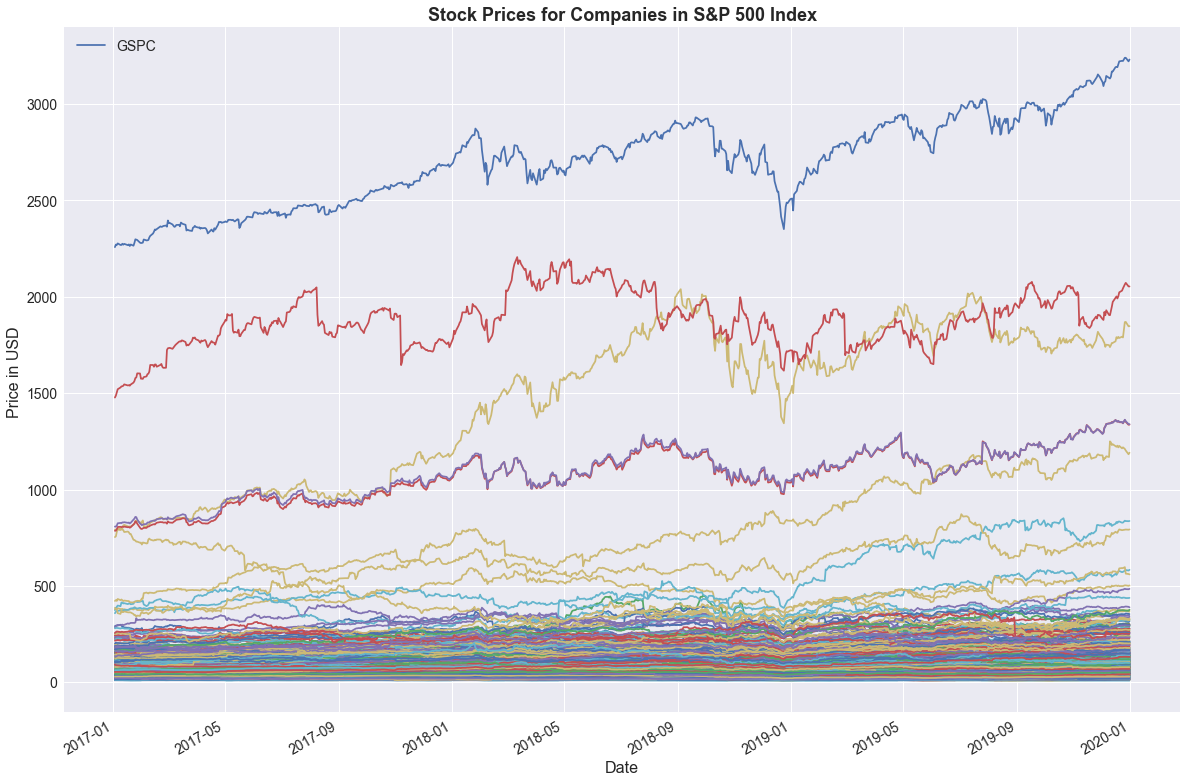

In [28]:
df.plot(figsize = (20,14), fontsize = 14, legend = None)  
plt.xlabel('Date', size = 16)
plt.ylabel('Price in USD ', size = 16)
plt.title('Stock Prices for Companies in S&P 500 Index', fontdict={'fontweight':'bold', 'fontsize':18})
plt.legend(['GSPC'], fontsize = 14, loc = 2)
plt.show()

In [29]:
df.loc[df.index == '2019-12-31'].T

Date   2019-12-31
GSPC  3230.780029
A       85.309998
AAL     28.680000
AAP    160.160004
AAPL    73.412498
...           ...
XYL     78.790001
YUM    100.730003
ZBH    149.679993
ZION    51.919998
ZTS    132.350006

[459 rows x 1 columns]

In [30]:
outliers = df.loc[df.index == '2019-12-31'].T.sort_values('2019-12-31', ascending = False).head(8).index.to_list()
outliers

['GSPC', 'BKNG', 'AMZN', 'GOOGL', 'GOOG', 'AZO', 'CMG', 'MTD']

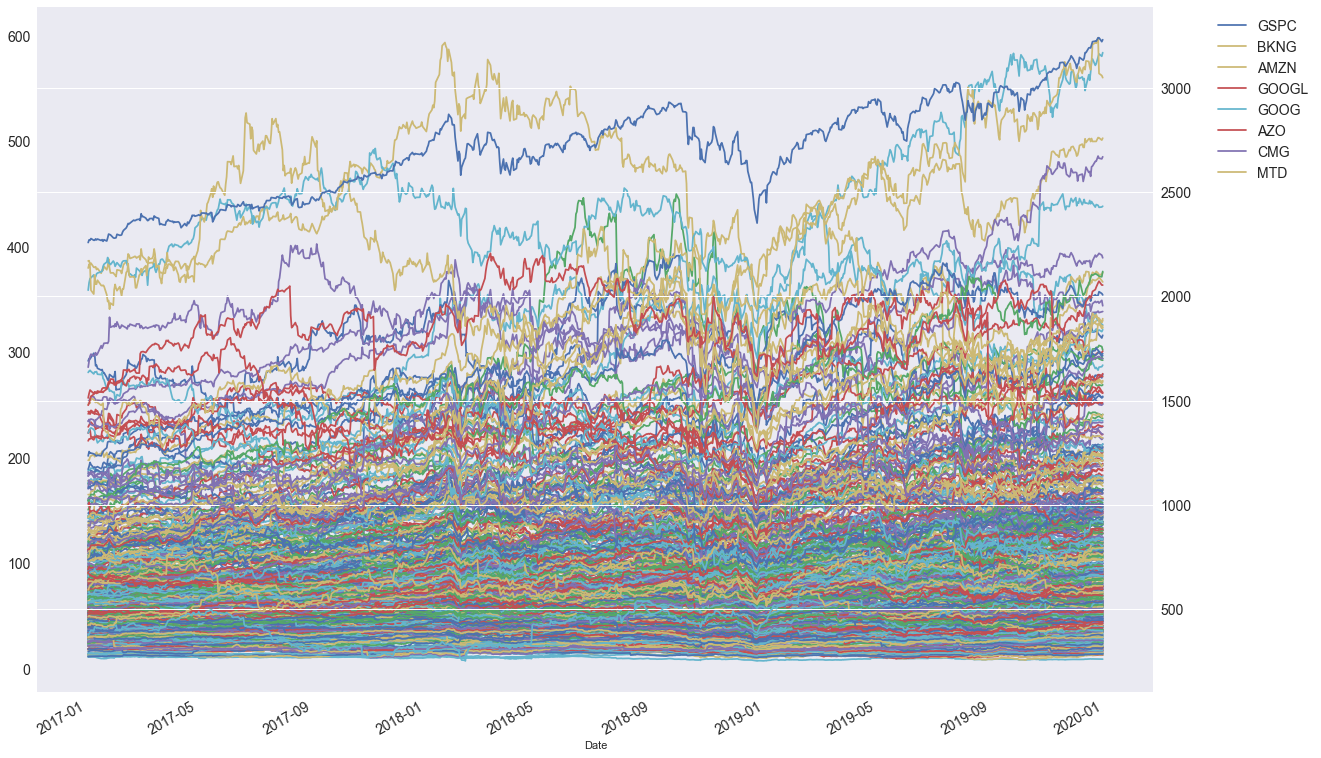

In [31]:
df.plot(figsize = (20,14), fontsize = 14  , secondary_y = outliers, legend = None)
plt.legend(outliers, fontsize = 14, loc = 1, bbox_to_anchor=(0.55, 0.4, 0.6, 0.6))
plt.show()

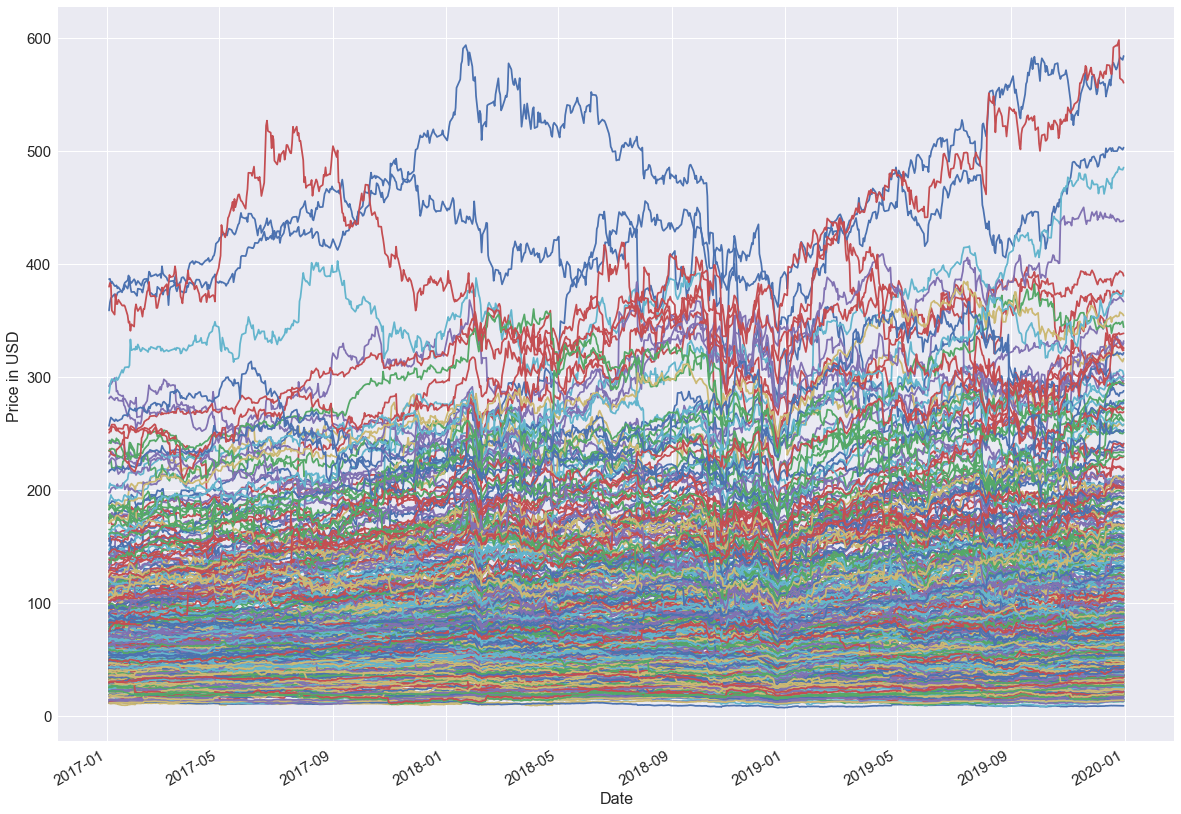

In [32]:
df.drop(columns = outliers).plot(figsize = (20,15), fontsize = 15, legend = None)
plt.xlabel('Date', size = 16)
plt.ylabel('Price in USD ', size = 16)
plt.show()

### Data Transformation

In [33]:
norm_df = df.div(df.iloc[0]) * 100
norm_df

GSPC           A         AAL         AAP        AAPL  \
Date                                                                     
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000   
2017-01-04  100.572227  101.312103  100.863934  100.820629   99.888072   
2017-01-05  100.494719  100.107548   99.114471  100.750292  100.396039   
2017-01-06  100.848155  103.226500   99.805615   99.431418  101.515284   
2017-01-09  100.490286  103.549145  101.684671   99.372798  102.445111   
...                ...         ...         ...         ...         ...   
2019-12-24  142.764503  183.480318   63.023760   94.120751  244.743853   
2019-12-26  143.496623  183.802955   64.082075   93.358733  249.599655   
2019-12-27  143.501500  183.738428   61.425488   92.819461  249.504937   
2019-12-30  142.671943  182.619915   61.123110   93.270803  250.985781   
2019-12-31  143.092257  183.501816   61.943846   93.880421  252.819621   

                  ABBV         ABC        ABMD         ABT         ACN  ...  \
Date                                                                    ...   
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000  ...   
2017-01-04  101.410032  102.481543  103.008186  100.793858  100.240425  ...   
2017-01-05  102.179139  101.295242  102.180489  101.664537   98.737763  ...   
2017-01-06  102.211186  102.651014  102.723387  104.430217   99.862617  ...   
2017-01-09  102.884152  103.474159  104.227483  104.327791   98.746351  ...   
...                ...         ...         ...         ...         ...  ...   
2019-12-24  143.967311  103.401522  153.346388  223.508324  181.701874  ...   
2019-12-26  143.935270  102.953641  152.198285  223.508324  182.079688  ...   
2019-12-27  142.925809  102.784170  150.649700  223.815629  182.225659  ...   
2019-12-30  141.836239  101.246821  148.887498  222.279141  180.868969  ...   
2019-12-31  141.868292  102.917318  151.824489  222.432784  180.808869  ...   

                  WYNN         XEL        XLNX         XOM        XRAY  \
Date                                                                     
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000   
2017-01-04  103.224331  100.443132   99.272050   98.899769  100.818832   
2017-01-05  104.550656  100.443132   98.070087   97.425463   99.505293   
2017-01-06  105.682599  100.738551   99.966141   97.370448   99.437056   
2017-01-09  106.048480   99.212211   99.983074   95.764112   99.744119   
...                ...         ...         ...         ...         ...   
2019-12-24  159.432888  154.751360  166.734380   77.038175   97.594678   
2019-12-26  161.147958  154.579031  167.056037   77.159201   96.434664   
2019-12-27  159.855933  155.391434  166.615877   76.895148   96.963496   
2019-12-30  159.364288  155.809952  165.363130   76.444057   96.212901   
2019-12-31  158.781153  156.302322  165.515485   76.774122   96.537020   

                   XYL         YUM         ZBH        ZION         ZTS  
Date                                                                    
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000  
2017-01-04  101.490429  100.363866  100.919382  101.435847  100.970331  
2017-01-05  100.563945  100.696096  101.567788   99.791570  100.634447  
2017-01-06   99.859014  101.914253  101.577468  100.440015  100.951667  
2017-01-09   99.436047  102.199018  103.551726   99.351554  100.671768  
...                ...         ...         ...         ...         ...  
2019-12-24  158.388715  158.724890  146.007928  119.337653  248.031345  
2019-12-26  158.308149  161.034650  145.456305  119.638720  248.236608  
2019-12-27  158.791529  161.208674  145.175643  119.268179  248.647135  
2019-12-30  158.590122  159.215315  143.956254  119.893469  246.706487  
2019-12-31  158.690833  159.357704  144.856276  120.240847  246.967729  

[754 rows x 459 columns]

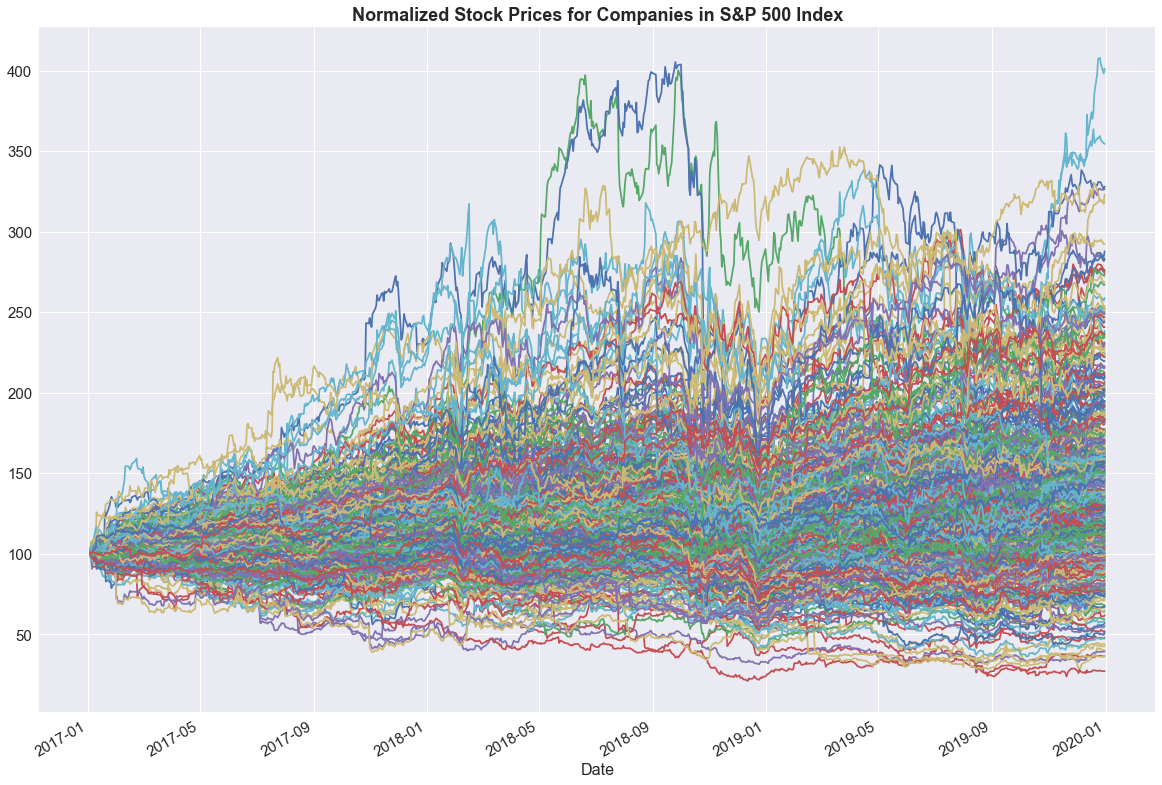

In [34]:
norm_df.plot(figsize = (20,14), fontsize = 15, legend = None) 
plt.xlabel('Date', size = 16)
plt.title('Normalized Stock Prices for Companies in S&P 500 Index', fontdict={'fontweight':'bold', 'fontsize':18})
plt.show()

## Return and Risk

In [35]:
ret = df.pct_change()
ret

GSPC         A       AAL       AAP      AAPL      ABBV  \
Date                                                                     
2017-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-04  0.005722  0.013121  0.008639  0.008206 -0.001119  0.014100   
2017-01-05 -0.000771 -0.011890 -0.017345 -0.000698  0.005085  0.007584   
2017-01-06  0.003517  0.031156  0.006973 -0.013091  0.011148  0.000314   
2017-01-09 -0.003549  0.003126  0.018827 -0.000590  0.009159  0.006584   
...              ...       ...       ...       ...       ...       ...   
2019-12-24 -0.000195  0.000469 -0.004096  0.003751  0.000951 -0.004432   
2019-12-26  0.005128  0.001758  0.016792 -0.008096  0.019840 -0.000223   
2019-12-27  0.000034 -0.000351 -0.041456 -0.005776 -0.000379 -0.007013   
2019-12-30 -0.005781 -0.006088 -0.004923  0.004863  0.005935 -0.007623   
2019-12-31  0.002946  0.004829  0.013428  0.006536  0.007307  0.000226   

                 ABC      ABMD       ABT       ACN  ...      WYNN       XEL  \
Date                                                ...                       
2017-01-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2017-01-04  0.024815  0.030082  0.007939  0.002404  ...  0.032243  0.004431   
2017-01-05 -0.011576 -0.008035  0.008638 -0.014991  ...  0.012849  0.000000   
2017-01-06  0.013384  0.005313  0.027204  0.011392  ...  0.010827  0.002941   
2017-01-09  0.008019  0.014642 -0.000981 -0.011178  ...  0.003462 -0.015151   
...              ...       ...       ...       ...  ...       ...       ...   
2019-12-24 -0.002103  0.010913 -0.000801  0.003700  ... -0.005634 -0.002539   
2019-12-26 -0.004331 -0.007487  0.000000  0.002079  ...  0.010757 -0.001114   
2019-12-27 -0.001646 -0.010175  0.001375  0.000802  ... -0.008018  0.005256   
2019-12-30 -0.014957 -0.011697 -0.006865 -0.007445  ... -0.003076  0.002693   
2019-12-31  0.016499  0.019726  0.000691 -0.000332  ... -0.003659  0.003160   

                XLNX       XOM      XRAY       XYL       YUM       ZBH  \
Date                                                                     
2017-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-04 -0.007280 -0.011002  0.008188  0.014904  0.003639  0.009194   
2017-01-05 -0.012108 -0.014907 -0.013029 -0.009129  0.003310  0.006425   
2017-01-06  0.019334 -0.000565 -0.000686 -0.007010  0.012097  0.000095   
2017-01-09  0.000169 -0.016497  0.003088 -0.004236  0.002794  0.019436   
...              ...       ...       ...       ...       ...       ...   
2019-12-24 -0.004146 -0.003841  0.000525 -0.003927  0.005210 -0.002447   
2019-12-26  0.001929  0.001571 -0.011886 -0.000509  0.014552 -0.003778   
2019-12-27 -0.002635 -0.003422  0.005484  0.003053  0.001081 -0.001930   
2019-12-30 -0.007519 -0.005866 -0.007741 -0.001268 -0.012365 -0.008399   
2019-12-31  0.000921  0.004318  0.003369  0.000635  0.000894  0.006252   

                ZION       ZTS  
Date                            
2017-01-03       NaN       NaN  
2017-01-04  0.014358  0.009703  
2017-01-05 -0.016210 -0.003327  
2017-01-06  0.006498  0.003152  
2017-01-09 -0.010837 -0.002773  
...              ...       ...  
2019-12-24  0.003701  0.004155  
2019-12-26  0.002523  0.000828  
2019-12-27 -0.003097  0.001654  
2019-12-30  0.005243 -0.007805  
2019-12-31  0.002897  0.001059  

[754 rows x 459 columns]

In [36]:
ret.describe()

GSPC           A         AAL         AAP        AAPL        ABBV  \
count  753.000000  753.000000  753.000000  753.000000  753.000000  753.000000   
mean     0.000509    0.000913   -0.000391    0.000137    0.001354    0.000619   
std      0.008065    0.014571    0.022094    0.020905    0.015565    0.017484   
min     -0.040979   -0.110117   -0.091229   -0.203439   -0.099607   -0.162524   
25%     -0.002240   -0.005905   -0.011776   -0.009122   -0.005289   -0.006822   
50%      0.000693    0.001330   -0.000291    0.000331    0.001177    0.001238   
75%      0.004512    0.008714    0.012766    0.010188    0.009333    0.008477   
max      0.049594    0.078422    0.086474    0.163345    0.070422    0.137673   

              ABC        ABMD         ABT         ACN  ...        WYNN  \
count  753.000000  753.000000  753.000000  753.000000  ...  753.000000   
mean     0.000190    0.000928    0.001135    0.000854  ...    0.000909   
std      0.017392    0.026781    0.012026    0.011541  ...    0.024274   
min     -0.104744   -0.264539   -0.047982   -0.072826  ...   -0.131327   
25%     -0.008001   -0.008922   -0.004860   -0.004241  ...   -0.010564   
50%      0.001335    0.001724    0.001230    0.001616  ...    0.000740   
75%      0.010192    0.013811    0.008414    0.007474  ...    0.012002   
max      0.093013    0.141993    0.061928    0.058967  ...    0.119582   

              XEL        XLNX         XOM        XRAY         XYL         YUM  \
count  753.000000  753.000000  753.000000  753.000000  753.000000  753.000000   
mean     0.000635    0.000898   -0.000288    0.000091    0.000711    0.000673   
std      0.009169    0.021445    0.011242    0.016510    0.013923    0.010347   
min     -0.045187   -0.170770   -0.056903   -0.186416   -0.087675   -0.074331   
25%     -0.004644   -0.008077   -0.006616   -0.006837   -0.006008   -0.003888   
50%      0.000690    0.000921    0.000116    0.001048    0.001052    0.000864   
75%      0.006194    0.010509    0.005990    0.007548    0.008863    0.006113   
max      0.029647    0.184366    0.047779    0.176485    0.093246    0.065133   

              ZBH        ZION         ZTS  
count  753.000000  753.000000  753.000000  
mean     0.000585    0.000363    0.001280  
std      0.013669    0.015329    0.012608  
min     -0.057613   -0.061274   -0.042974  
25%     -0.005907   -0.009028   -0.004645  
50%      0.000649    0.001038    0.001521  
75%      0.008173    0.010244    0.007908  
max      0.085465    0.052770    0.076397  

[8 rows x 459 columns]

In [37]:
def ann_rr(returns):
    output = returns.agg(['mean', 'std']).T
    output['Annualized Return'] = output['mean'] * 252
    output['Annualized Risk'] = output['std'] * np.sqrt(252)
    output.drop(columns = ['mean', 'std'], inplace = True)
    return output

In [38]:
RR = ann_rr(ret)
RR

Annualized Return  Annualized Risk
GSPC           0.128154         0.128032
A              0.230187         0.231314
AAL           -0.098522         0.350729
AAP            0.034519         0.331849
AAPL           0.341172         0.247093
...                 ...              ...
XYL            0.179046         0.221016
YUM            0.169503         0.164255
ZBH            0.147456         0.216994
ZION           0.091353         0.243333
ZTS            0.322654         0.200149

[459 rows x 2 columns]

In [39]:
comp

Symbol              Company                Industry  Date Added
0      MMM                   3M             Industrials  1976-08-09
1      ABT  Abbott Laboratories             Health Care  1964-03-31
2     ABBV               AbbVie             Health Care  2012-12-31
3     ABMD              Abiomed             Health Care  2018-05-31
4      ACN            Accenture  Information Technology  2011-07-06
..     ...                  ...                     ...         ...
455    XYL                Xylem             Industrials  2011-11-01
456    YUM          Yum! Brands  Consumer Discretionary  1997-10-06
457    ZBH        Zimmer Biomet             Health Care  2001-08-07
458   ZION        Zions Bancorp              Financials  2001-06-22
459    ZTS               Zoetis             Health Care  2013-06-21

[460 rows x 4 columns]

In [40]:
RR = pd.merge(RR, comp.loc[:, ['Company', 'Symbol']], how = 'left', left_index = True, right_on = 'Symbol')
RR

Annualized Return  Annualized Risk                  Company Symbol
NaN             0.128154         0.128032                      NaN   GSPC
11.0            0.230187         0.231314     Agilent Technologies      A
26.0           -0.098522         0.350729  American Airlines Group    AAL
8.0             0.034519         0.331849       Advance Auto Parts    AAP
43.0            0.341172         0.247093                    Apple   AAPL
...                  ...              ...                      ...    ...
455.0           0.179046         0.221016                    Xylem    XYL
456.0           0.169503         0.164255              Yum! Brands    YUM
457.0           0.147456         0.216994            Zimmer Biomet    ZBH
458.0           0.091353         0.243333            Zions Bancorp   ZION
459.0           0.322654         0.200149                   Zoetis    ZTS

[459 rows x 4 columns]

In [41]:
RR.set_index('Company', inplace = True)
RR.rename(index={np.nan:'S&P 500'}, inplace = True)
RR

Annualized Return  Annualized Risk Symbol
Company                                                           
S&P 500                           0.128154         0.128032   GSPC
Agilent Technologies              0.230187         0.231314      A
American Airlines Group          -0.098522         0.350729    AAL
Advance Auto Parts                0.034519         0.331849    AAP
Apple                             0.341172         0.247093   AAPL
...                                    ...              ...    ...
Xylem                             0.179046         0.221016    XYL
Yum! Brands                       0.169503         0.164255    YUM
Zimmer Biomet                     0.147456         0.216994    ZBH
Zions Bancorp                     0.091353         0.243333   ZION
Zoetis                            0.322654         0.200149    ZTS

[459 rows x 3 columns]

## Data Analysis (Return, Risk and Correlation Between Stocks)

In [42]:
RR.sort_values('Annualized Return', ascending = False)

Annualized Return  Annualized Risk Symbol
Company                                                          
Advanced Micro Devices           0.636594         0.585153    AMD
Fortinet                         0.473189         0.315040   FTNT
Align Technology                 0.449354         0.429284   ALGN
NRG Energy                       0.439499         0.313380    NRG
MSCI                             0.426526         0.239602   MSCI
...                                   ...              ...    ...
Halliburton                     -0.227692         0.307789    HAL
Baker Hughes                    -0.236070         0.369994    BKR
General Electric                -0.275148         0.349259     GE
Kraft Heinz                     -0.290591         0.289420    KHC
Bath & Body Works               -0.332120         0.448974   BBWI

[459 rows x 3 columns]

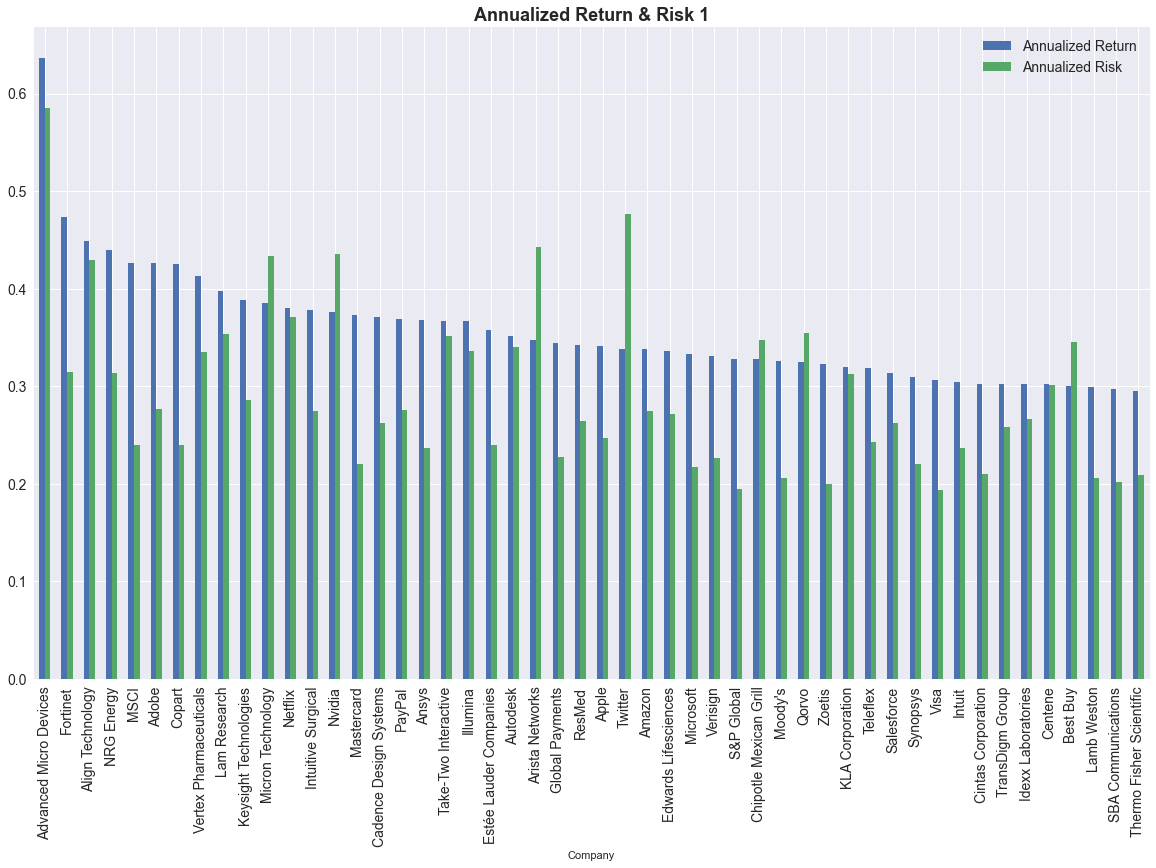

In [43]:
RR.sort_values('Annualized Return', ascending = False).head(50).plot(kind = 'bar', figsize = (20,12), fontsize = 14)                                                               
plt.title('Annualized Return & Risk 1', fontdict={'fontweight':'bold', 'fontsize':18})
plt.legend(fontsize = 14)
plt.show()

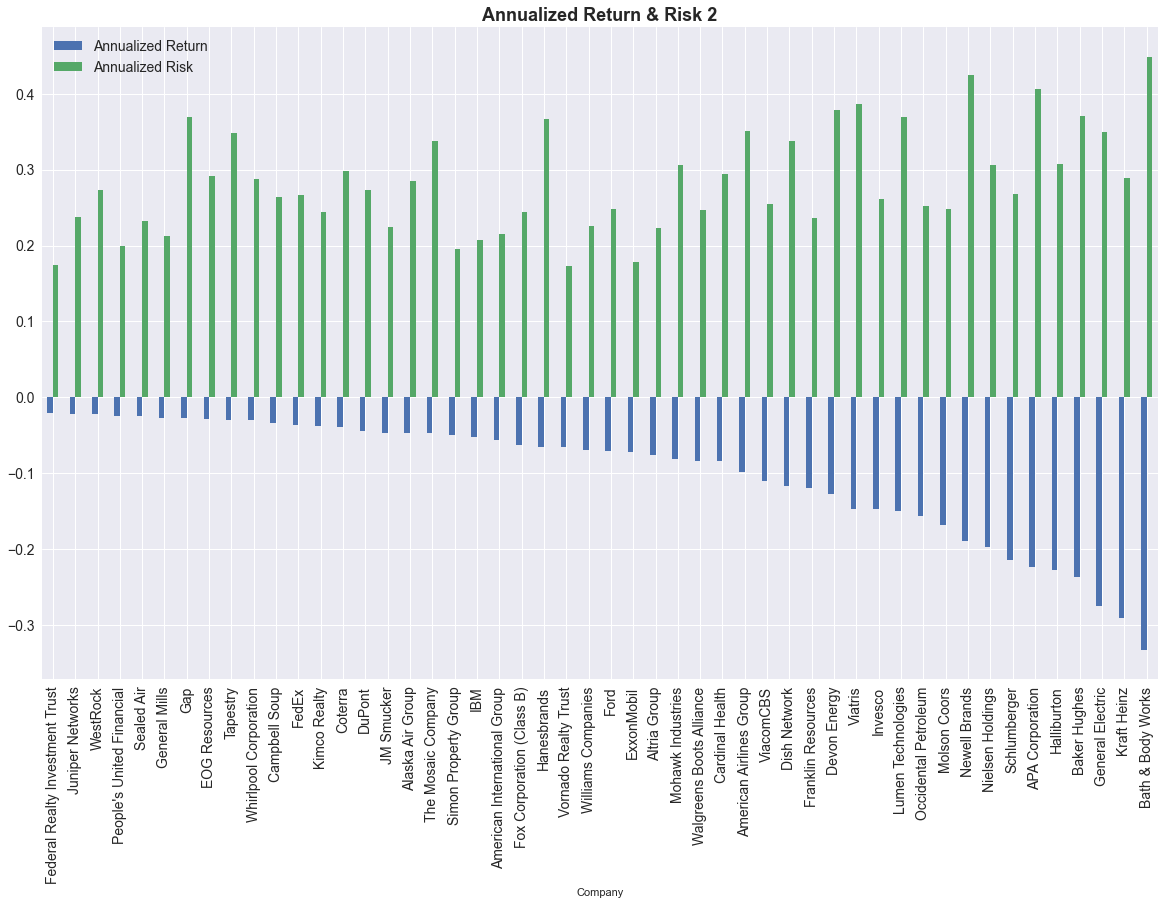

In [44]:
RR.sort_values('Annualized Return', ascending = False).tail(50).plot(kind = 'bar', figsize = (20,12), fontsize = 14)
plt.title('Annualized Return & Risk 2', fontdict={'fontweight':'bold', 'fontsize':18})
plt.legend(fontsize = 14)
plt.show()

In [45]:
RR.sort_values('Annualized Risk', ascending = False)

Annualized Return  Annualized Risk Symbol
Company                                                          
Advanced Micro Devices           0.636594         0.585153    AMD
Under Armour (Class A)           0.012231         0.486163    UAA
Twitter                          0.338126         0.476023   TWTR
Under Armour (Class C)           0.016288         0.474714     UA
Bath & Body Works               -0.332120         0.448974   BBWI
...                                   ...              ...    ...
Coca-Cola                        0.104167         0.142378     KO
DTE Energy                       0.103589         0.141812    DTE
Republic Services                0.161661         0.136938    RSG
Duke Energy                      0.062835         0.136384    DUK
S&P 500                          0.128154         0.128032   GSPC

[459 rows x 3 columns]

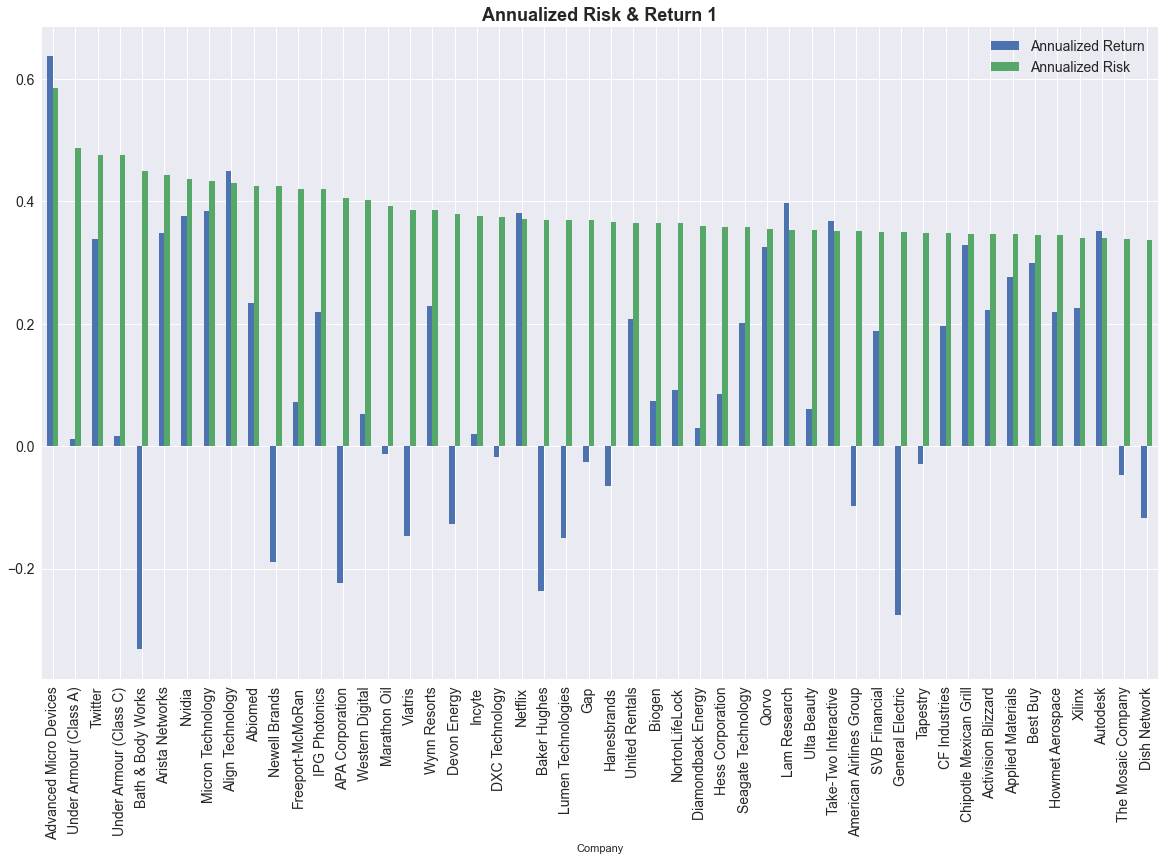

In [46]:
RR.sort_values('Annualized Risk', ascending = False).head(50).plot(kind = 'bar', figsize = (20,12), fontsize = 14)
plt.title('Annualized Risk & Return 1', fontdict = {'fontweight':'bold', 'fontsize':18})
plt.legend(fontsize = 14)
plt.show()

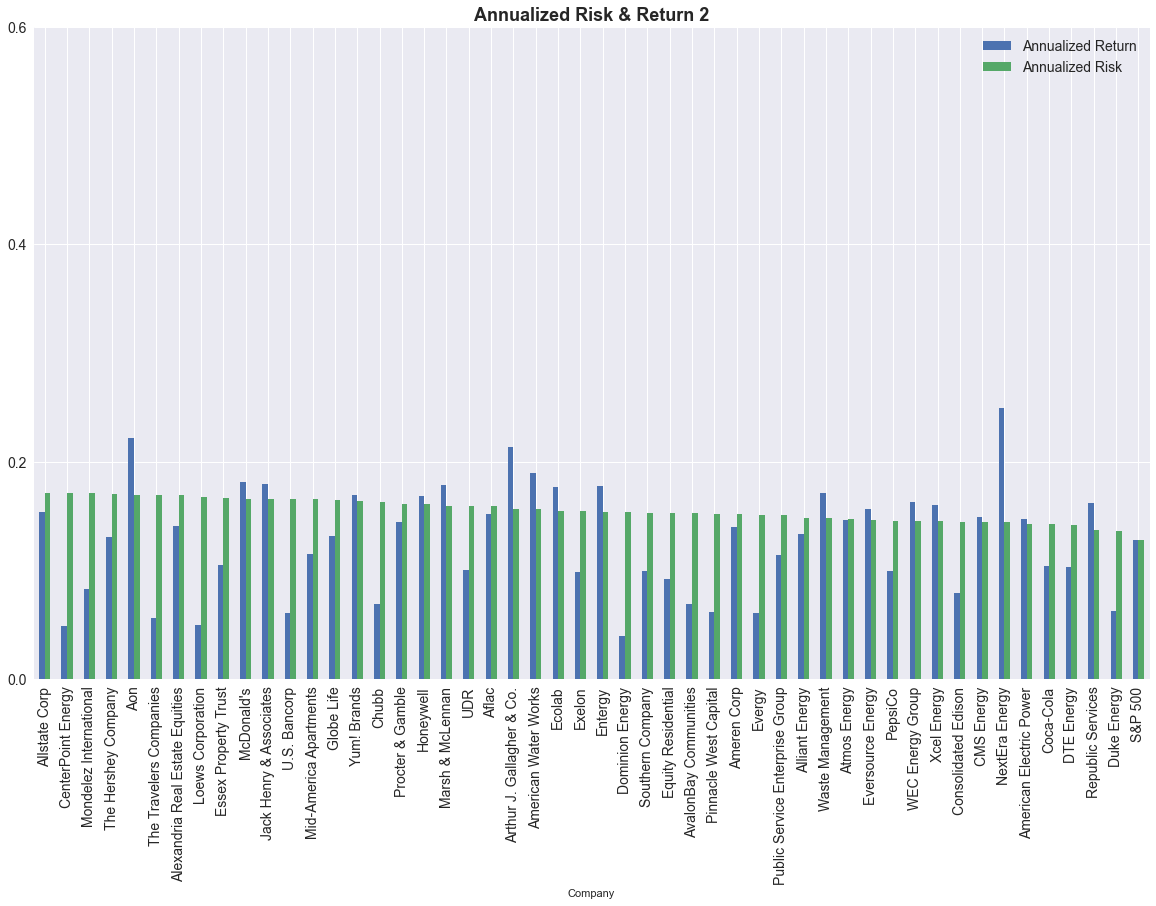

In [47]:
RR.sort_values('Annualized Risk', ascending = False).tail(50).plot(kind = 'bar', figsize = (20,12), fontsize = 14)
plt.title('Annualized Risk & Return 2', fontdict = {'fontweight':'bold', 'fontsize':18})
plt.yticks([0, 0.2, 0.4, 0.6])
plt.legend(fontsize = 14)
plt.show()

In [48]:
RR.set_index('Symbol', inplace = True)
RR

Annualized Return  Annualized Risk
Symbol                                    
GSPC             0.128154         0.128032
A                0.230187         0.231314
AAL             -0.098522         0.350729
AAP              0.034519         0.331849
AAPL             0.341172         0.247093
...                   ...              ...
XYL              0.179046         0.221016
YUM              0.169503         0.164255
ZBH              0.147456         0.216994
ZION             0.091353         0.243333
ZTS              0.322654         0.200149

[459 rows x 2 columns]

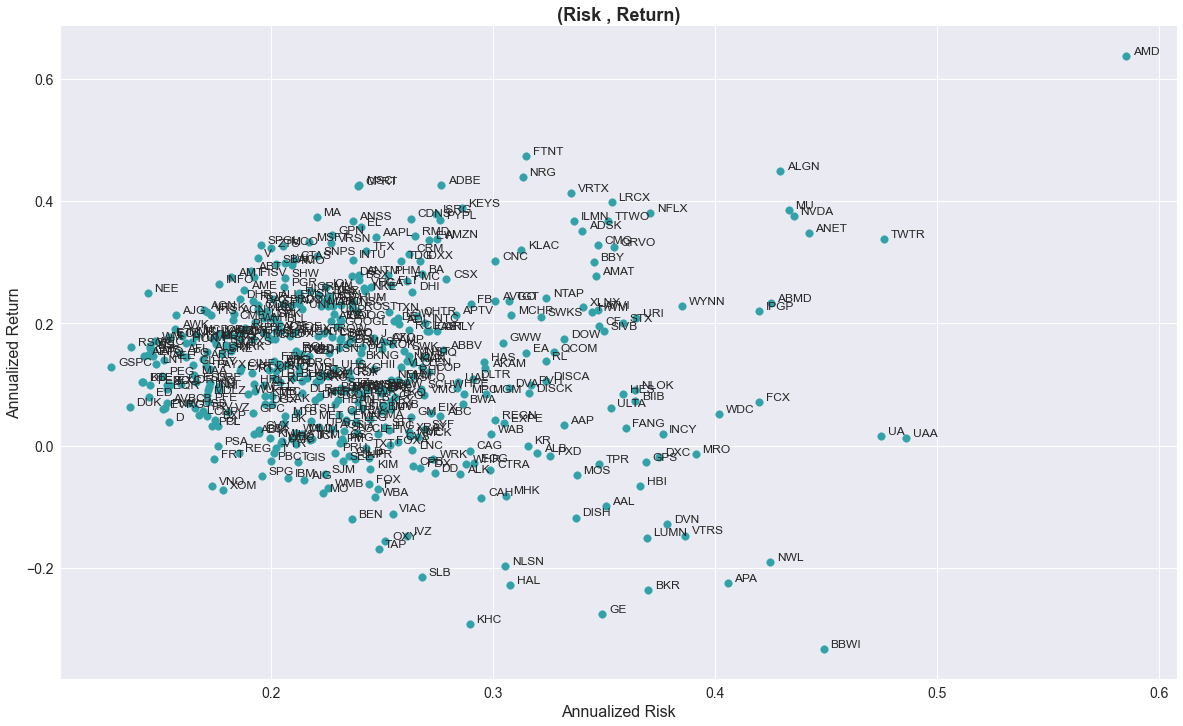

In [49]:
RR.plot(kind = 'scatter', x = 'Annualized Risk', y = 'Annualized Return', s = 60, figsize = (20,12), 
        fontsize = 14, color = '#32a2a8')  
for i in RR.index:
    plt.annotate(i, xy = (RR.loc[i, 'Annualized Risk']+0.003, RR.loc[i, 'Annualized Return']+0.003), size = 12 )
plt.xlabel('Annualized Risk', size = 16) 
plt.ylabel('Annualized Return', size = 16)
plt.title('(Risk , Return)', fontdict = {'fontweight':'bold', 'fontsize':18})
plt.show()

### Correlation between the stocks

In [50]:
corr_matrix = ret.corr()
corr_matrix

GSPC         A       AAL       AAP      AAPL      ABBV       ABC  \
GSPC  1.000000  0.652201  0.532143  0.293547  0.708413  0.484676  0.416721   
A     0.652201  1.000000  0.344608  0.161726  0.430075  0.342116  0.262382   
AAL   0.532143  0.344608  1.000000  0.187764  0.361619  0.195927  0.254444   
AAP   0.293547  0.161726  0.187764  1.000000  0.138061  0.139717  0.177924   
AAPL  0.708413  0.430075  0.361619  0.138061  1.000000  0.274648  0.227140   
...        ...       ...       ...       ...       ...       ...       ...   
XYL   0.623588  0.461250  0.376620  0.169916  0.375963  0.290855  0.213602   
YUM   0.502943  0.352988  0.242633  0.138290  0.286701  0.212210  0.173954   
ZBH   0.548423  0.413025  0.273978  0.162486  0.342852  0.317446  0.322690   
ZION  0.560583  0.350878  0.384471  0.258110  0.309043  0.259683  0.221401   
ZTS   0.625868  0.500239  0.318055  0.191761  0.399713  0.346252  0.286414   

          ABMD       ABT       ACN  ...      WYNN       XEL      XLNX  \
GSPC  0.436910  0.698044  0.744271  ...  0.469741  0.148349  0.557410   
A     0.339441  0.561752  0.522908  ...  0.299479  0.110520  0.376982   
AAL   0.170989  0.331631  0.320682  ...  0.334452 -0.047946  0.406062   
AAP   0.115183  0.191616  0.215111  ...  0.049605  0.047716  0.120754   
AAPL  0.361948  0.456464  0.504113  ...  0.366109  0.019516  0.459461   
...        ...       ...       ...  ...       ...       ...       ...   
XYL   0.264930  0.442365  0.478163  ...  0.350942  0.048821  0.383151   
YUM   0.168629  0.410255  0.406239  ...  0.099107  0.181430  0.267043   
ZBH   0.262275  0.525994  0.421518  ...  0.240537  0.124739  0.255183   
ZION  0.236667  0.313550  0.352398  ...  0.279115 -0.132629  0.325500   
ZTS   0.292759  0.549417  0.517244  ...  0.262532  0.207321  0.296760   

           XOM      XRAY       XYL       YUM       ZBH      ZION       ZTS  
GSPC  0.622487  0.349067  0.623588  0.502943  0.548423  0.560583  0.625868  
A     0.346511  0.255398  0.461250  0.352988  0.413025  0.350878  0.500239  
AAL   0.242975  0.174545  0.376620  0.242633  0.273978  0.384471  0.318055  
AAP   0.186293  0.089580  0.169916  0.138290  0.162486  0.258110  0.191761  
AAPL  0.374882  0.223196  0.375963  0.286701  0.342852  0.309043  0.399713  
...        ...       ...       ...       ...       ...       ...       ...  
XYL   0.425686  0.219448  1.000000  0.329762  0.322630  0.386926  0.449000  
YUM   0.248170  0.116242  0.329762  1.000000  0.268409  0.207914  0.462207  
ZBH   0.285983  0.297562  0.322630  0.268409  1.000000  0.293724  0.366365  
ZION  0.373092  0.188823  0.386926  0.207914  0.293724  1.000000  0.255339  
ZTS   0.323009  0.260216  0.449000  0.462207  0.366365  0.255339  1.000000  

[459 rows x 459 columns]

In [51]:
corr_matrix.agg('min')

GSPC    0.037219
A       0.059657
AAL    -0.076649
AAP    -0.015263
AAPL   -0.014078
          ...   
XYL    -0.031009
YUM     0.031466
ZBH     0.021902
ZION   -0.132629
ZTS     0.041271
Length: 459, dtype: float64

In [52]:
min(corr_matrix.agg('min'))

-0.2994551343946184

In [53]:
RR1 = RR.reset_index()
RR1

Symbol  Annualized Return  Annualized Risk
0     GSPC           0.128154         0.128032
1        A           0.230187         0.231314
2      AAL          -0.098522         0.350729
3      AAP           0.034519         0.331849
4     AAPL           0.341172         0.247093
..     ...                ...              ...
454    XYL           0.179046         0.221016
455    YUM           0.169503         0.164255
456    ZBH           0.147456         0.216994
457   ZION           0.091353         0.243333
458    ZTS           0.322654         0.200149

[459 rows x 3 columns]

In [54]:

def top_performers(number):
    return RR1.sort_values('Annualized Return', ascending = False).iloc[:number, 0].to_list()


def top_mid_performers(number):
    return RR1.sort_values('Annualized Return', ascending = False).iloc[150:150+number, 0].to_list()


def mid_performers(number):
    return RR1.sort_values('Annualized Return', ascending = False).iloc[300:300+number, 0].to_list()


def bottom_performers(number):
    return RR1.sort_values('Annualized Return', ascending = False).iloc[459-number:, 0].to_list()

In [55]:
def high_risk(number):
    return RR.sort_values('Annualized Risk', ascending = False).head(number)

def low_risk(number):
    return RR.sort_values('Annualized Risk', ascending = False).tail(number)


In [56]:
n = 10

In [57]:
top = top_performers(n)
top

['AMD', 'FTNT', 'ALGN', 'NRG', 'MSCI', 'ADBE', 'CPRT', 'VRTX', 'LRCX', 'KEYS']

In [58]:
top_mid = top_mid_performers(n)
top_mid

['CCI', 'WLTW', 'APD', 'TJX', 'HD', 'JKHY', 'XYL', 'AMGN', 'MMC', 'ETR']

In [59]:
mid = mid_performers(n)
mid

['HES', 'MGM', 'MPC', 'WU', 'VMC', 'MDLZ', 'NTRS', 'TFC', 'KMB', 'PWR']

In [60]:
bot = bottom_performers(n)
bot

['TAP', 'NWL', 'NLSN', 'SLB', 'APA', 'HAL', 'BKR', 'GE', 'KHC', 'BBWI']

In [61]:
reps = ['GSPC'] + top + top_mid + mid + bot 
reps

['GSPC',
 'AMD',
 'FTNT',
 'ALGN',
 'NRG',
 'MSCI',
 'ADBE',
 'CPRT',
 'VRTX',
 'LRCX',
 'KEYS',
 'CCI',
 'WLTW',
 'APD',
 'TJX',
 'HD',
 'JKHY',
 'XYL',
 'AMGN',
 'MMC',
 'ETR',
 'HES',
 'MGM',
 'MPC',
 'WU',
 'VMC',
 'MDLZ',
 'NTRS',
 'TFC',
 'KMB',
 'PWR',
 'TAP',
 'NWL',
 'NLSN',
 'SLB',
 'APA',
 'HAL',
 'BKR',
 'GE',
 'KHC',
 'BBWI']

In [62]:
corr_reps = ret.loc[:, reps].corr()
corr_reps

GSPC       AMD      FTNT      ALGN       NRG      MSCI      ADBE  \
GSPC  1.000000  0.457955  0.504161  0.484679  0.325625  0.655764  0.686623   
AMD   0.457955  1.000000  0.335347  0.375219  0.147848  0.347689  0.377854   
FTNT  0.504161  0.335347  1.000000  0.329396  0.194428  0.471756  0.538615   
ALGN  0.484679  0.375219  0.329396  1.000000  0.190744  0.374939  0.458701   
NRG   0.325625  0.147848  0.194428  0.190744  1.000000  0.255003  0.261145   
MSCI  0.655764  0.347689  0.471756  0.374939  0.255003  1.000000  0.554188   
ADBE  0.686623  0.377854  0.538615  0.458701  0.261145  0.554188  1.000000   
CPRT  0.526282  0.236015  0.340192  0.289352  0.156791  0.400735  0.428643   
VRTX  0.475962  0.271340  0.311699  0.322180  0.234622  0.335214  0.411145   
LRCX  0.610638  0.407197  0.343479  0.419726  0.176711  0.408919  0.481826   
KEYS  0.601774  0.354541  0.395739  0.374396  0.212201  0.434717  0.474449   
CCI   0.259474  0.036870  0.111693  0.124547  0.218989  0.197871  0.196819   
WLTW  0.539949  0.189165  0.120852  0.223762  0.213188  0.359675  0.348637   
APD   0.647588  0.254582  0.263105  0.258452  0.194742  0.448237  0.401515   
TJX   0.497592  0.143851  0.281736  0.205298  0.145664  0.330769  0.315166   
HD    0.644651  0.279835  0.301202  0.283390  0.187469  0.380852  0.373667   
JKHY  0.609613  0.305570  0.383813  0.342203  0.240318  0.509266  0.549533   
XYL   0.623588  0.237259  0.280107  0.331253  0.227403  0.364519  0.417053   
AMGN  0.569548  0.212289  0.314417  0.314094  0.158822  0.369830  0.355540   
MMC   0.628040  0.216740  0.274457  0.217763  0.227104  0.493042  0.404569   
ETR   0.151131 -0.034798  0.046046  0.092781  0.221287  0.141120  0.111961   
HES   0.531212  0.217244  0.223061  0.260389  0.232233  0.318024  0.271320   
MGM   0.585605  0.321393  0.323943  0.290896  0.155752  0.403994  0.420010   
MPC   0.552945  0.284441  0.268084  0.256752  0.198662  0.340875  0.373665   
WU    0.517749  0.210738  0.321531  0.256444  0.185339  0.407372  0.353327   
VMC   0.452975  0.229479  0.258201  0.271598  0.159363  0.313738  0.291871   
MDLZ  0.463042  0.174584  0.181128  0.181481  0.218338  0.303278  0.247987   
NTRS  0.672345  0.291126  0.309289  0.256619  0.167036  0.405303  0.362049   
TFC   0.581180  0.196513  0.194978  0.144787  0.125144  0.339307  0.233890   
KMB   0.293629  0.080443  0.052335  0.085021  0.130646  0.158887  0.088684   
PWR   0.613082  0.299767  0.272398  0.295594  0.191783  0.332039  0.326306   
TAP   0.340242  0.137814  0.126159  0.117164  0.175991  0.159541  0.148104   
NWL   0.344065  0.126941  0.120965  0.131731  0.107921  0.132991  0.154887   
NLSN  0.393193  0.129425  0.136843  0.178509  0.173704  0.274617  0.201764   
SLB   0.492890  0.190383  0.146005  0.186249  0.152856  0.242995  0.201741   
APA   0.414044  0.175417  0.174521  0.184871  0.179687  0.219682  0.190686   
HAL   0.473184  0.235846  0.174731  0.179890  0.182631  0.241464  0.212936   
BKR   0.343917  0.136626  0.040595  0.133932  0.124999  0.189326  0.161960   
GE    0.371773  0.206150  0.186493  0.176596  0.094050  0.198813  0.211290   
KHC   0.268278  0.045776  0.097803  0.121785  0.138872  0.112656  0.127146   
BBWI  0.338249  0.096329  0.142003  0.100817  0.121494  0.162318  0.149378   

          CPRT      VRTX      LRCX  ...       TAP       NWL      NLSN  \
GSPC  0.526282  0.475962  0.610638  ...  0.340242  0.344065  0.393193   
AMD   0.236015  0.271340  0.407197  ...  0.137814  0.126941  0.129425   
FTNT  0.340192  0.311699  0.343479  ...  0.126159  0.120965  0.136843   
ALGN  0.289352  0.322180  0.419726  ...  0.117164  0.131731  0.178509   
NRG   0.156791  0.234622  0.176711  ...  0.175991  0.107921  0.173704   
MSCI  0.400735  0.335214  0.408919  ...  0.159541  0.132991  0.274617   
ADBE  0.428643  0.411145  0.481826  ...  0.148104  0.154887  0.201764   
CPRT  1.000000  0.275015  0.315570  ...  0.132633  0.167361  0.202475   
VRTX  0.275015  1.000000  0.340058  ...  0.177105  0.148343  0.189496   
LRC

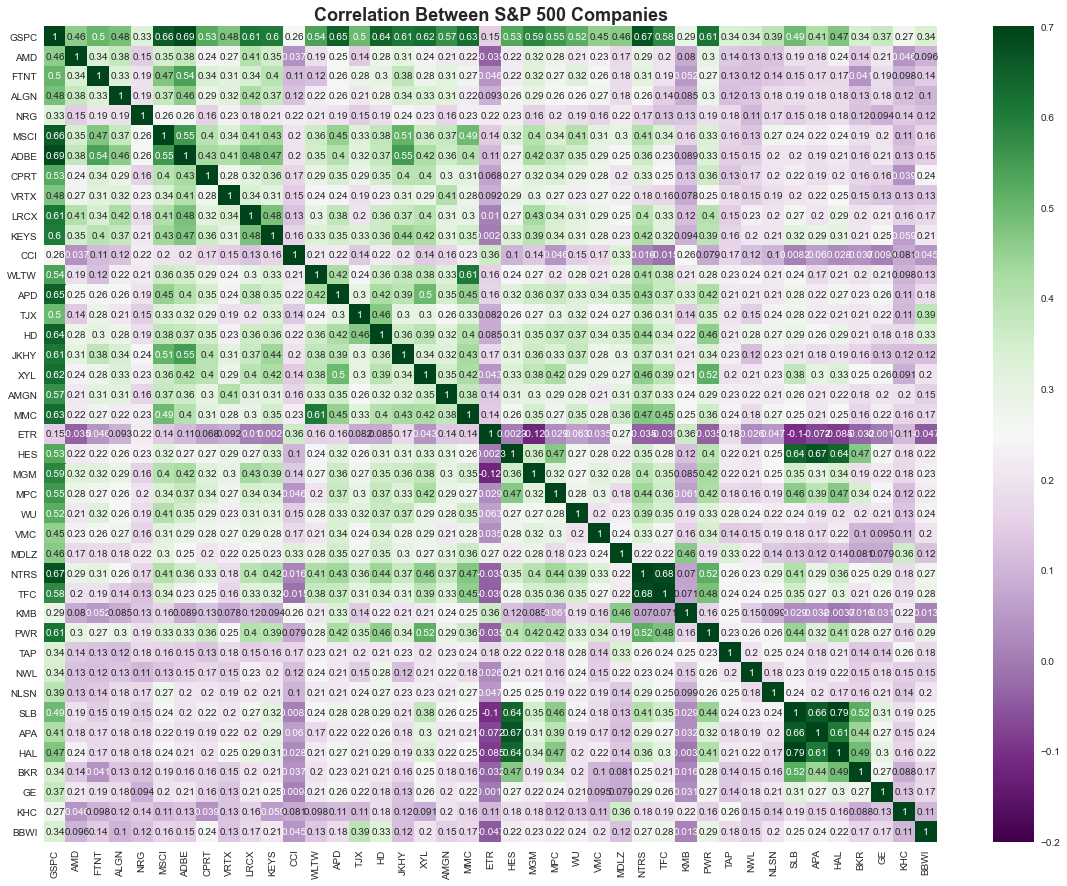

In [63]:
plt.figure(figsize = (20,15))
sns.heatmap(corr_reps, cmap = 'PRGn', annot = True, vmin = -0.2, vmax = 0.7)
plt.title('Correlation Between S&P 500 Companies', fontdict={'fontweight':'bold', 'fontsize':18})
plt.show()

In [64]:
corr_topbot = ret.loc[:, top + bot].corr()
corr_topbot

AMD      FTNT      ALGN       NRG      MSCI      ADBE      CPRT  \
AMD   1.000000  0.335347  0.375219  0.147848  0.347689  0.377854  0.236015   
FTNT  0.335347  1.000000  0.329396  0.194428  0.471756  0.538615  0.340192   
ALGN  0.375219  0.329396  1.000000  0.190744  0.374939  0.458701  0.289352   
NRG   0.147848  0.194428  0.190744  1.000000  0.255003  0.261145  0.156791   
MSCI  0.347689  0.471756  0.374939  0.255003  1.000000  0.554188  0.400735   
ADBE  0.377854  0.538615  0.458701  0.261145  0.554188  1.000000  0.428643   
CPRT  0.236015  0.340192  0.289352  0.156791  0.400735  0.428643  1.000000   
VRTX  0.271340  0.311699  0.322180  0.234622  0.335214  0.411145  0.275015   
LRCX  0.407197  0.343479  0.419726  0.176711  0.408919  0.481826  0.315570   
KEYS  0.354541  0.395739  0.374396  0.212201  0.434717  0.474449  0.362204   
TAP   0.137814  0.126159  0.117164  0.175991  0.159541  0.148104  0.132633   
NWL   0.126941  0.120965  0.131731  0.107921  0.132991  0.154887  0.167361   
NLSN  0.129425  0.136843  0.178509  0.173704  0.274617  0.201764  0.202475   
SLB   0.190383  0.146005  0.186249  0.152856  0.242995  0.201741  0.223172   
APA   0.175417  0.174521  0.184871  0.179687  0.219682  0.190686  0.189009   
HAL   0.235846  0.174731  0.179890  0.182631  0.241464  0.212936  0.199107   
BKR   0.136626  0.040595  0.133932  0.124999  0.189326  0.161960  0.162618   
GE    0.206150  0.186493  0.176596  0.094050  0.198813  0.211290  0.158468   
KHC   0.045776  0.097803  0.121785  0.138872  0.112656  0.127146  0.038986   
BBWI  0.096329  0.142003  0.100817  0.121494  0.162318  0.149378  0.242704   

          VRTX      LRCX      KEYS       TAP       NWL      NLSN       SLB  \
AMD   0.271340  0.407197  0.354541  0.137814  0.126941  0.129425  0.190383   
FTNT  0.311699  0.343479  0.395739  0.126159  0.120965  0.136843  0.146005   
ALGN  0.322180  0.419726  0.374396  0.117164  0.131731  0.178509  0.186249   
NRG   0.234622  0.176711  0.212201  0.175991  0.107921  0.173704  0.152856   
MSCI  0.335214  0.408919  0.434717  0.159541  0.132991  0.274617  0.242995   
ADBE  0.411145  0.481826  0.474449  0.148104  0.154887  0.201764  0.201741   
CPRT  0.275015  0.315570  0.362204  0.132633  0.167361  0.202475  0.223172   
VRTX  1.000000  0.340058  0.307714  0.177105  0.148343  0.189496  0.203067   
LRCX  0.340058  1.000000  0.480959  0.148887  0.229839  0.203839  0.267474   
KEYS  0.307714  0.480959  1.000000  0.160458  0.203059  0.206867  0.316066   
TAP   0.177105  0.148887  0.160458  1.000000  0.204117  0.248258  0.239387   
NWL   0.148343  0.229839  0.203059  0.204117  1.000000  0.178335  0.229042   
NLSN  0.189496  0.203839  0.206867  0.248258  0.178335  1.000000  0.237941   
SLB   0.203067  0.267474  0.316066  0.239387  0.229042  0.237941  1.000000   
APA   0.215693  0.202337  0.290232  0.182111  0.190230  0.200290  0.660733   
HAL   0.250865  0.291690  0.306702  0.213775  0.219796  0.174427  0.788647   
BKR   0.146973  0.197985  0.208787  0.139281  0.149822  0.160215  0.518096   
GE    0.131978  0.214944  0.245750  0.135956  0.179557  0.206636  0.309841   
KHC   0.127083  0.156235  0.058729  0.257802  0.154838  0.138748  0.192106   
BBWI  0.132546  0.171497  0.208618  0.178232  0.152306  0.203401  0.252067   

           APA       HAL       BKR        GE       KHC      BBWI  
AMD   0.175417  0.235846  0.136626  0.206150  0.045776  0.096329  
FTNT  0.174521  0.174731  0.040595  0.186493  0.097803  0.142003  
ALGN  0.184871  0.179890  0.133932  0.176596  0.121785  0.100817  
NRG   0.179687  0.182631  0.124999  0.094050  0.138872  0.121494  
MSCI  0.219682  0.241464  0.189326  0.198813  0.112656  0.162318  
ADBE  0.190686  0.212936  0.161960  0.211290  0.127146  0.149378  
CPRT  0.189009  0.199107  0.162618  0.158468  0.038986  0.242704  
VRTX  0.215693  0.250865  0.146973  0.131978  0.127083  0.132546  
LRCX  0.202337  0.291690  0.197985  0.214944  0.156235  0.171497  
KEYS  0.290232  0.306702  0.208787  0.245750  0.058729  0.20861

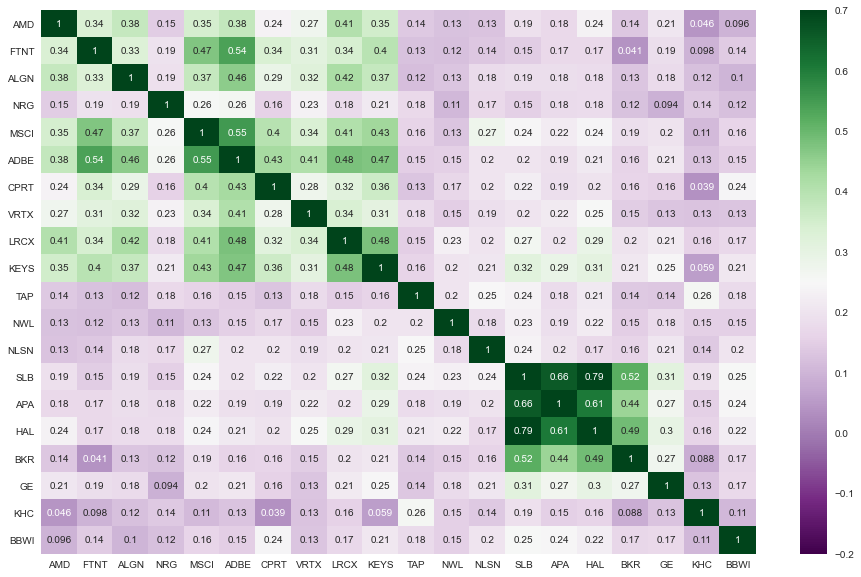

In [65]:
plt.figure(figsize = (16,10))
sns.heatmap(corr_topbot, cmap = 'PRGn', annot = True, vmin = -0.2, vmax = 0.7)  
plt.yticks(rotation = 0)
plt.show()

In [66]:
corr_top = ret.loc[:, top].corr()
corr_top

AMD      FTNT      ALGN       NRG      MSCI      ADBE      CPRT  \
AMD   1.000000  0.335347  0.375219  0.147848  0.347689  0.377854  0.236015   
FTNT  0.335347  1.000000  0.329396  0.194428  0.471756  0.538615  0.340192   
ALGN  0.375219  0.329396  1.000000  0.190744  0.374939  0.458701  0.289352   
NRG   0.147848  0.194428  0.190744  1.000000  0.255003  0.261145  0.156791   
MSCI  0.347689  0.471756  0.374939  0.255003  1.000000  0.554188  0.400735   
ADBE  0.377854  0.538615  0.458701  0.261145  0.554188  1.000000  0.428643   
CPRT  0.236015  0.340192  0.289352  0.156791  0.400735  0.428643  1.000000   
VRTX  0.271340  0.311699  0.322180  0.234622  0.335214  0.411145  0.275015   
LRCX  0.407197  0.343479  0.419726  0.176711  0.408919  0.481826  0.315570   
KEYS  0.354541  0.395739  0.374396  0.212201  0.434717  0.474449  0.362204   

          VRTX      LRCX      KEYS  
AMD   0.271340  0.407197  0.354541  
FTNT  0.311699  0.343479  0.395739  
ALGN  0.322180  0.419726  0.374396  
NRG   0.234622  0.176711  0.212201  
MSCI  0.335214  0.408919  0.434717  
ADBE  0.411145  0.481826  0.474449  
CPRT  0.275015  0.315570  0.362204  
VRTX  1.000000  0.340058  0.307714  
LRCX  0.340058  1.000000  0.480959  
KEYS  0.307714  0.480959  1.000000

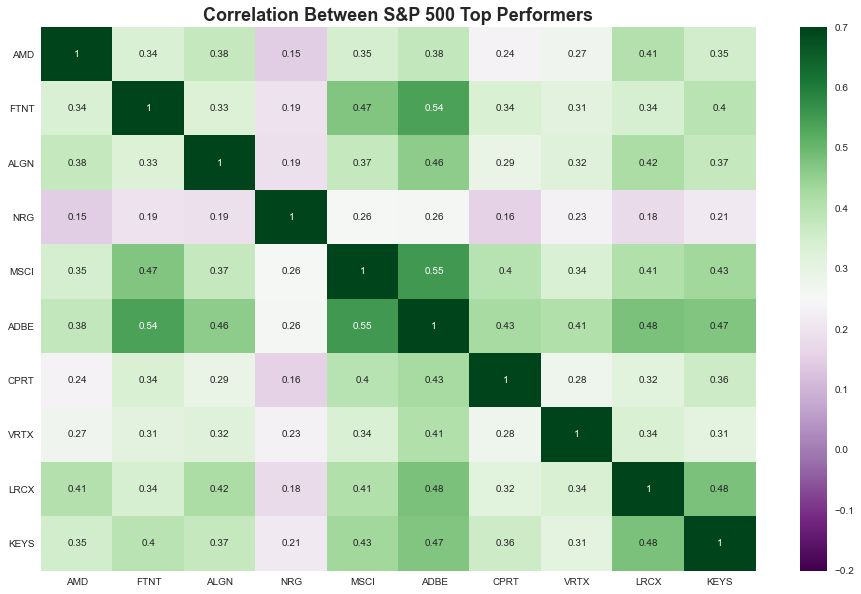

In [67]:
plt.figure(figsize = (16,10))
sns.heatmap(corr_top, cmap = 'PRGn', annot = True, vmin = -0.2, vmax = 0.7) 
plt.title('Correlation Between S&P 500 Top Performers', fontdict={'fontweight':'bold', 'fontsize':18})
plt.yticks(rotation = 0)
plt.show()

In [68]:
corr_bot = ret.loc[:, bot].corr()

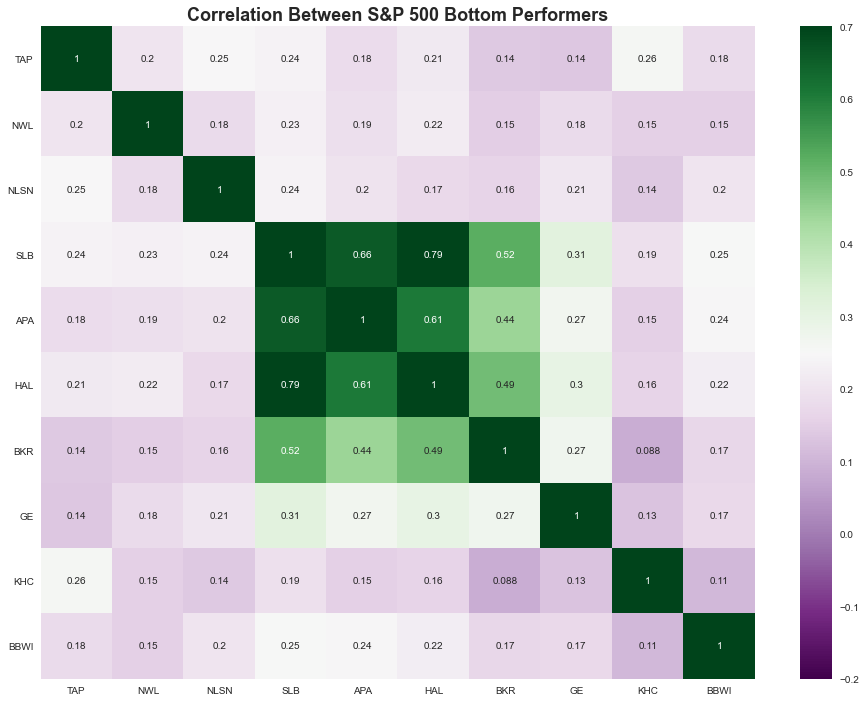

In [69]:
plt.figure(figsize = (16,12))
sns.heatmap(corr_bot, cmap = 'PRGn', annot = True, vmin = -0.2, vmax = 0.7)  
plt.title('Correlation Between S&P 500 Bottom Performers', fontdict={'fontweight':'bold', 'fontsize':18})

plt.yticks(rotation = 0)
plt.show()

## Index Tracking


We are going to track the GSPC index with a tracking portfolio of only __34 stocks__ (about 7 percent of the stocks). <br>
Criteria for selecting stocks of the tracking portfolio: <br>
- __19 stocks__ with the __lowest tracking error__ in the training period. <br>
- __15 stocks__ with the __lowest return difference__ in the training period. <br>


Training Period: 2017 & 2018 <br>
Testing Period: 2019 <br>


In [70]:
df

GSPC          A        AAL         AAP       AAPL  \
Date                                                                   
2017-01-03  2257.830078  46.490002  46.299999  170.600006  29.037500   
2017-01-04  2270.750000  47.099998  46.700001  172.000000  29.004999   
2017-01-05  2269.000000  46.540001  45.889999  171.880005  29.152500   
2017-01-06  2276.979980  47.990002  46.209999  169.630005  29.477501   
2017-01-09  2268.899902  48.139999  47.080002  169.529999  29.747499   
...                 ...        ...        ...         ...        ...   
2019-12-24  3223.379883  85.300003  29.180000  160.570007  71.067497   
2019-12-26  3239.909912  85.449997  29.670000  159.270004  72.477501   
2019-12-27  3240.020020  85.419998  28.440001  158.350006  72.449997   
2019-12-30  3221.290039  84.900002  28.299999  159.119995  72.879997   
2019-12-31  3230.780029  85.309998  28.680000  160.160004  73.412498   

                 ABBV        ABC        ABMD        ABT         ACN  ...  \
Date                                                                 ...   
2017-01-03  62.410000  82.610001  112.360001  39.049999  116.459999  ...   
2017-01-04  63.290001  84.660004  115.739998  39.360001  116.739998  ...   
2017-01-05  63.770000  83.680000  114.809998  39.700001  114.989998  ...   
2017-01-06  63.790001  84.800003  115.419998  40.779999  116.300003  ...   
2017-01-09  64.209999  85.480003  117.110001  40.740002  115.000000  ...   
...               ...        ...         ...        ...         ...  ...   
2019-12-24  89.849998  85.419998  172.300003  87.279999  211.610001  ...   
2019-12-26  89.830002  85.050003  171.009995  87.279999  212.050003  ...   
2019-12-27  89.199997  84.910004  169.270004  87.400002  212.220001  ...   
2019-12-30  88.519997  83.639999  167.289993  86.800003  210.639999  ...   
2019-12-31  88.540001  85.019997  170.589996  86.860001  210.570007  ...   

                  WYNN        XEL       XLNX        XOM       XRAY        XYL  \
Date                                                                            
2017-01-03   87.459999  40.619999  59.070000  90.889999  58.619999  49.650002   
2017-01-04   90.279999  40.799999  58.639999  89.889999  59.099998  50.389999   
2017-01-05   91.440002  40.799999  57.930000  88.550003  58.330002  49.930000   
2017-01-06   92.430000  40.919998  59.049999  88.500000  58.290001  49.580002   
2017-01-09   92.750000  40.299999  59.060001  87.040001  58.470001  49.369999   
...                ...        ...        ...        ...        ...        ...   
2019-12-24  139.440002  62.860001  98.489998  70.019997  57.209999  78.639999   
2019-12-26  140.940002  62.790001  98.680000  70.129997  56.529999  78.599998   
2019-12-27  139.809998  63.119999  98.419998  69.889999  56.840000  78.839996   
2019-12-30  139.380005  63.290001  97.680000  69.480003  56.400002  78.739998   
2019-12-31  138.869995  63.490002  97.769997  69.779999  56.590000  78.790001   

                   YUM         ZBH       ZION         ZTS  
Date                                                       
2017-01-03   63.209999  103.330002  43.180000   53.590000  
2017-01-04   63.439999  104.279999  43.799999   54.110001  
2017-01-05   63.650002  104.949997  43.090000   53.930000  
2017-01-06   64.419998  104.959999  43.369999   54.099998  
2017-01-09   64.599998  107.000000  42.900002   53.950001  
...                ...         ...        ...         ...  
2019-12-24  100.330002  150.869995  51.529999  132.919998  
2019-12-26  101.790001  150.300003  51.660000  133.029999  
2019-12-27  101.900002  150.009995  51.500000  133.250000  
2019-12-30  100.639999  148.750000  51.770000  132.210007  
2019-12-31  100.730003  149.679993  51.919998  132.350006  

[754 rows x 459 columns]

In [71]:
dft = df.loc['2017':'2018'] 
dft

GSPC          A        AAL         AAP       AAPL  \
Date                                                                   
2017-01-03  2257.830078  46.490002  46.299999  170.600006  29.037500   
2017-01-04  2270.750000  47.099998  46.700001  172.000000  29.004999   
2017-01-05  2269.000000  46.540001  45.889999  171.880005  29.152500   
2017-01-06  2276.979980  47.990002  46.209999  169.630005  29.477501   
2017-01-09  2268.899902  48.139999  47.080002  169.529999  29.747499   
...                 ...        ...        ...         ...        ...   
2018-12-24  2351.100098  62.669998  29.719999  148.919998  36.707500   
2018-12-26  2467.699951  65.540001  32.290001  155.029999  39.292500   
2018-12-27  2488.830078  66.480003  32.040001  154.690002  39.037498   
2018-12-28  2485.739990  65.959999  31.830000  155.460007  39.057499   
2018-12-31  2506.850098  67.459999  32.110001  157.460007  39.435001   

                 ABBV        ABC        ABMD        ABT         ACN  ...  \
Date                                                                 ...   
2017-01-03  62.410000  82.610001  112.360001  39.049999  116.459999  ...   
2017-01-04  63.290001  84.660004  115.739998  39.360001  116.739998  ...   
2017-01-05  63.770000  83.680000  114.809998  39.700001  114.989998  ...   
2017-01-06  63.790001  84.800003  115.419998  40.779999  116.300003  ...   
2017-01-09  64.209999  85.480003  117.110001  40.740002  115.000000  ...   
...               ...        ...         ...        ...         ...  ...   
2018-12-24  84.160004  70.760002  281.079987  65.559998  133.669998  ...   
2018-12-26  89.040001  73.040001  307.440002  69.620003  139.009995  ...   
2018-12-27  89.910004  73.529999  315.670013  70.629997  140.410004  ...   
2018-12-28  91.120003  73.959999  318.170013  71.089996  139.820007  ...   
2018-12-31  92.190002  74.400002  325.040009  72.330002  141.009995  ...   

                 WYNN        XEL       XLNX        XOM       XRAY        XYL  \
Date                                                                           
2017-01-03  87.459999  40.619999  59.070000  90.889999  58.619999  49.650002   
2017-01-04  90.279999  40.799999  58.639999  89.889999  59.099998  50.389999   
2017-01-05  91.440002  40.799999  57.930000  88.550003  58.330002  49.930000   
2017-01-06  92.430000  40.919998  59.049999  88.500000  58.290001  49.580002   
2017-01-09  92.750000  40.299999  59.060001  87.040001  58.470001  49.369999   
...               ...        ...        ...        ...        ...        ...   
2018-12-24  92.010002  48.599998  79.269997  65.510002  35.459999  61.380001   
2018-12-26  99.230003  49.560001  85.220001  68.639999  37.189999  64.269997   
2018-12-27  98.120003  49.599998  84.300003  68.940002  37.119999  65.349998   
2018-12-28  97.239998  49.250000  84.339996  68.169998  37.099998  65.300003   
2018-12-31  98.910004  49.270000  85.169998  68.190002  37.209999  66.720001   

                  YUM         ZBH       ZION        ZTS  
Date                                                     
2017-01-03  63.209999  103.330002  43.180000  53.590000  
2017-01-04  63.439999  104.279999  43.799999  54.110001  
2017-01-05  63.650002  104.949997  43.090000  53.930000  
2017-01-06  64.419998  104.959999  43.369999  54.099998  
2017-01-09  64.599998  107.000000  42.900002  53.950001  
...               ...         ...        ...        ...  
2018-12-24  87.019997   97.230003  38.509998  79.279999  
2018-12-26  89.989998  102.019997  40.509998  82.919998  
2018-12-27  90.959999  101.709999  40.459999  84.330002  
2018-12-28  91.610001  102.650002  40.430000  84.489998  
2018-12-31  91.919998  103.720001  40.740002  85.540001  

[502 rows x 459 columns]

In [72]:
norm_dft = dft.div(dft.iloc[0]) * 100
norm_dft

GSPC           A         AAL         AAP        AAPL  \
Date                                                                     
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000   
2017-01-04  100.572227  101.312103  100.863934  100.820629   99.888072   
2017-01-05  100.494719  100.107548   99.114471  100.750292  100.396039   
2017-01-06  100.848155  103.226500   99.805615   99.431418  101.515284   
2017-01-09  100.490286  103.549145  101.684671   99.372798  102.445111   
...                ...         ...         ...         ...         ...   
2018-12-24  104.130958  134.803175   64.190064   87.291907  126.414120   
2018-12-26  109.295202  140.976551   69.740824   90.873384  135.316398   
2018-12-27  110.231062  142.998496   69.200867   90.674090  134.438219   
2018-12-28  110.094201  141.879967   68.747301   91.125440  134.507097   
2018-12-31  111.029175  145.106467   69.352054   92.297773  135.807149   

                  ABBV         ABC        ABMD         ABT         ACN  ...  \
Date                                                                    ...   
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000  ...   
2017-01-04  101.410032  102.481543  103.008186  100.793858  100.240425  ...   
2017-01-05  102.179139  101.295242  102.180489  101.664537   98.737763  ...   
2017-01-06  102.211186  102.651014  102.723387  104.430217   99.862617  ...   
2017-01-09  102.884152  103.474159  104.227483  104.327791   98.746351  ...   
...                ...         ...         ...         ...         ...  ...   
2018-12-24  134.850190   85.655492  250.160186  167.887321  114.777605  ...   
2018-12-26  142.669446   88.415447  273.620506  178.284261  119.362868  ...   
2018-12-27  144.063458   89.008592  280.945187  180.870675  120.565005  ...   
2018-12-28  146.002248   89.529111  283.170178  182.048650  120.058396  ...   
2018-12-31  147.716716   90.061737  289.284449  185.224080  121.080195  ...   

                  WYNN         XEL        XLNX         XOM        XRAY  \
Date                                                                     
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000   
2017-01-04  103.224331  100.443132   99.272050   98.899769  100.818832   
2017-01-05  104.550656  100.443132   98.070087   97.425463   99.505293   
2017-01-06  105.682599  100.738551   99.966141   97.370448   99.437056   
2017-01-09  106.048480   99.212211   99.983074   95.764112   99.744119   
...                ...         ...         ...         ...         ...   
2018-12-24  105.202382  119.645494  134.196711   72.076139   60.491299   
2018-12-26  113.457586  122.008869  144.269514   75.519859   63.442510   
2018-12-27  112.188433  122.107336  142.712042   75.849932   63.323097   
2018-12-28  111.182253  121.245695  142.779747   75.002749   63.288978   
2018-12-31  113.091704  121.294933  144.184863   75.024758   63.476629   

                   XYL         YUM         ZBH        ZION         ZTS  
Date                                                                    
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000  
2017-01-04  101.490429  100.363866  100.919382  101.435847  100.970331  
2017-01-05  100.563945  100.696096  101.567788   99.791570  100.634447  
2017-01-06   99.859014  101.914253  101.577468  100.440015  100.951667  
2017-01-09   99.436047  102.199018  103.551726   99.351554  100.671768  
...                ...         ...         ...         ...         ...  
2018-12-24  123.625376  137.668087   94.096585   89.184803  147.938045  
2018-12-26  129.446112  142.366713   98.732212   93.816577  154.730356  
2018-12-27  131.621342  143.901282   98.432205   93.700785  157.361451  
2018-12-28  131.520647  144.929603   99.341914   93.631311  157.660007  
2018-12-31  134.380663  145.420028  100.377431   94.349239  159.619333  

[502 rows x 459 columns]

In [73]:
ret_t = ret.loc['2017':'2018'] 
ret_t

GSPC         A       AAL       AAP      AAPL      ABBV  \
Date                                                                     
2017-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-04  0.005722  0.013121  0.008639  0.008206 -0.001119  0.014100   
2017-01-05 -0.000771 -0.011890 -0.017345 -0.000698  0.005085  0.007584   
2017-01-06  0.003517  0.031156  0.006973 -0.013091  0.011148  0.000314   
2017-01-09 -0.003549  0.003126  0.018827 -0.000590  0.009159  0.006584   
...              ...       ...       ...       ...       ...       ...   
2018-12-24 -0.027112 -0.009796 -0.034438 -0.016445 -0.025874 -0.008950   
2018-12-26  0.049594  0.045795  0.086474  0.041029  0.070422  0.057985   
2018-12-27  0.008563  0.014342 -0.007742 -0.002193 -0.006490  0.009771   
2018-12-28 -0.001242 -0.007822 -0.006554  0.004978  0.000512  0.013458   
2018-12-31  0.008492  0.022741  0.008797  0.012865  0.009665  0.011743   

                 ABC      ABMD       ABT       ACN  ...      WYNN       XEL  \
Date                                                ...                       
2017-01-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2017-01-04  0.024815  0.030082  0.007939  0.002404  ...  0.032243  0.004431   
2017-01-05 -0.011576 -0.008035  0.008638 -0.014991  ...  0.012849  0.000000   
2017-01-06  0.013384  0.005313  0.027204  0.011392  ...  0.010827  0.002941   
2017-01-09  0.008019  0.014642 -0.000981 -0.011178  ...  0.003462 -0.015151   
...              ...       ...       ...       ...  ...       ...       ...   
2018-12-24 -0.016949 -0.031727 -0.025420 -0.025729  ... -0.014988 -0.045187   
2018-12-26  0.032222  0.093781  0.061928  0.039949  ...  0.078470  0.019753   
2018-12-27  0.006709  0.026769  0.014507  0.010071  ... -0.011186  0.000807   
2018-12-28  0.005848  0.007920  0.006513 -0.004202  ... -0.008969 -0.007056   
2018-12-31  0.005949  0.021592  0.017443  0.008511  ...  0.017174  0.000406   

                XLNX       XOM      XRAY       XYL       YUM       ZBH  \
Date                                                                     
2017-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-04 -0.007280 -0.011002  0.008188  0.014904  0.003639  0.009194   
2017-01-05 -0.012108 -0.014907 -0.013029 -0.009129  0.003310  0.006425   
2017-01-06  0.019334 -0.000565 -0.000686 -0.007010  0.012097  0.000095   
2017-01-09  0.000169 -0.016497  0.003088 -0.004236  0.002794  0.019436   
...              ...       ...       ...       ...       ...       ...   
2018-12-24 -0.027481 -0.038315 -0.005330 -0.032472 -0.012707 -0.021634   
2018-12-26  0.075060  0.047779  0.048787  0.047084  0.034130  0.049265   
2018-12-27 -0.010796  0.004371 -0.001882  0.016804  0.010779 -0.003039   
2018-12-28  0.000474 -0.011169 -0.000539 -0.000765  0.007146  0.009242   
2018-12-31  0.009841  0.000293  0.002965  0.021746  0.003384  0.010424   

                ZION       ZTS  
Date                            
2017-01-03       NaN       NaN  
2017-01-04  0.014358  0.009703  
2017-01-05 -0.016210 -0.003327  
2017-01-06  0.006498  0.003152  
2017-01-09 -0.010837 -0.002773  
...              ...       ...  
2018-12-24 -0.014081 -0.029383  
2018-12-26  0.051935  0.045913  
2018-12-27 -0.001234  0.017004  
2018-12-28 -0.000741  0.001897  
2018-12-31  0.007668  0.012428  

[502 rows x 459 columns]

In [74]:
ret_diff = ret_t.sub(ret_t['GSPC'], axis = 0)
ret_diff

GSPC         A       AAL       AAP      AAPL      ABBV       ABC  \
Date                                                                           
2017-01-03   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-04   0.0  0.007399  0.002917  0.002484 -0.006842  0.008378  0.019093   
2017-01-05   0.0 -0.011119 -0.016574  0.000073  0.005856  0.008355 -0.010805   
2017-01-06   0.0  0.027639  0.003456 -0.016607  0.007631 -0.003203  0.009867   
2017-01-09   0.0  0.006674  0.022376  0.002959  0.012708  0.010133  0.011567   
...          ...       ...       ...       ...       ...       ...       ...   
2018-12-24   0.0  0.017316 -0.007326  0.010667  0.001238  0.018163  0.010163   
2018-12-26   0.0 -0.003798  0.036880 -0.008565  0.020828  0.008391 -0.017372   
2018-12-27   0.0  0.005780 -0.016305 -0.010756 -0.015052  0.001208 -0.001854   
2018-12-28   0.0 -0.006580 -0.005313  0.006219  0.001754  0.014699  0.007090   
2018-12-31   0.0  0.014249  0.000304  0.004373  0.001173  0.003250 -0.002543   

                ABMD       ABT       ACN  ...      WYNN       XEL      XLNX  \
Date                                      ...                                 
2017-01-03       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2017-01-04  0.024360  0.002216 -0.003318  ...  0.026521 -0.001291 -0.013002   
2017-01-05 -0.007265  0.009409 -0.014220  ...  0.013620  0.000771 -0.011337   
2017-01-06  0.001796  0.023687  0.007875  ...  0.007310 -0.000576  0.015817   
2017-01-09  0.018191  0.002568 -0.007629  ...  0.007011 -0.011603  0.003718   
...              ...       ...       ...  ...       ...       ...       ...   
2018-12-24 -0.004615  0.001692  0.001383  ...  0.012125 -0.018074 -0.000369   
2018-12-26  0.044187  0.012334 -0.009645  ...  0.028876 -0.029841  0.025466   
2018-12-27  0.018207  0.005945  0.001509  ... -0.019749 -0.007756 -0.019358   
2018-12-28  0.009161  0.007754 -0.002960  ... -0.007727 -0.005815  0.001716   
2018-12-31  0.013100  0.008950  0.000018  ...  0.008682 -0.008086  0.001349   

                 XOM      XRAY       XYL       YUM       ZBH      ZION  \
Date                                                                     
2017-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-04 -0.016725  0.002466  0.009182 -0.002084  0.003472  0.008636   
2017-01-05 -0.014136 -0.012258 -0.008358  0.004081  0.007196 -0.015439   
2017-01-06 -0.004082 -0.004203 -0.010527  0.008580 -0.003422  0.002981   
2017-01-09 -0.012949  0.006637 -0.000687  0.006343  0.022985 -0.007288   
...              ...       ...       ...       ...       ...       ...   
2018-12-24 -0.011202  0.021783 -0.005359  0.014405  0.005478  0.013031   
2018-12-26 -0.001815 -0.000806 -0.002510 -0.015464 -0.000329  0.002341   
2018-12-27 -0.004192 -0.010445  0.008241  0.002216 -0.011601 -0.009797   
2018-12-28 -0.009928  0.000703  0.000477  0.008388  0.010484  0.000500   
2018-12-31 -0.008199 -0.005528  0.013253 -0.005109  0.001931 -0.000825   

                 ZTS  
Date                  
2017-01-03       NaN  
2017-01-04  0.003981  
2017-01-05 -0.002556  
2017-01-06 -0.000365  
2017-01-09  0.000776  
...              ...  
2018-12-24 -0.002271  
2018-12-26 -0.003681  
2018-12-27  0.008442  
2018-12-28  0.003139  
2018-12-31  0.003935  

[502 rows x 459 columns]

In [75]:
ret_diff.agg(['mean', 'std']).T.dropna()

mean       std
GSPC  0.000000  0.000000
A     0.000601  0.010708
AAL  -0.000731  0.019030
AAP  -0.000140  0.021816
AAPL  0.000482  0.011106
...        ...       ...
XYL   0.000442  0.010898
YUM   0.000562  0.009068
ZBH  -0.000143  0.011207
ZION -0.000246  0.012362
ZTS   0.000768  0.009319

[456 rows x 2 columns]

### Selecting the Tracking Stocks 

In [76]:
def ann_tracking(returns):
    output = returns.agg(['mean', 'std']).T
    output['Premium'] = output['mean'] * 252
    output['TE'] = output['std'] * np.sqrt(252)
    output.drop(columns = ['mean', 'std'], inplace = True)
    return output

In [77]:
tracking = ann_tracking(ret_diff)
tracking

Premium        TE
GSPC  0.000000  0.000000
A     0.151575  0.169992
AAL  -0.184091  0.302087
AAP  -0.035402  0.346324
AAPL  0.121457  0.176310
...        ...       ...
XYL   0.111408  0.173004
YUM   0.141593  0.143954
ZBH  -0.035932  0.177913
ZION -0.061976  0.196234
ZTS   0.193485  0.147940

[459 rows x 2 columns]

In [78]:
tracking = tracking.dropna()
tracking.sort_values('TE')   

Premium        TE
GSPC  0.000000  0.000000
HON   0.036927  0.099834
ECL   0.061188  0.111778
APH   0.045559  0.114301
L    -0.066039  0.115808
...        ...       ...
BBWI -0.439083  0.420783
TWTR  0.347526  0.473020
UA   -0.164255  0.480726
UAA  -0.186119  0.496707
AMD   0.366716  0.569175

[456 rows x 2 columns]

In [79]:
def Union(lst1, lst2):
    final_list = list(set(lst1) | set(lst2))
    return final_list

In [80]:
noe = 19
nop = 15

e1 = tracking.sort_values('TE').index[:noe+1]
p1 = tracking.sort_values('Premium').index[:nop+1]
tracking_stocks1 = Union(e1, p1)
tracking_stocks1

['SLB',
 'L',
 'APA',
 'USB',
 'GSPC',
 'PFE',
 'CPB',
 'DISH',
 'CAG',
 'HAL',
 'MMC',
 'GL',
 'ABT',
 'BKR',
 'AJG',
 'NLSN',
 'BBWI',
 'GE',
 'NWL',
 'FISV',
 'ECL',
 'DHR',
 'APD',
 'KHC',
 'IVZ',
 'TAP',
 'FIS',
 'ACN',
 'RSG',
 'AME',
 'DVN',
 'AON',
 'APH',
 'V',
 'HON',
 'WDC']

In [81]:
len(tracking_stocks1)

36

In [82]:
norm_track = norm_dft.loc[:, tracking_stocks1]
norm_track

SLB           L         APA         USB        GSPC  \
Date                                                                     
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000   
2017-01-04  100.742921   99.364408   99.702103  100.738440  100.572227   
2017-01-05  100.589623   98.601695   99.169020   99.047808  100.494719   
2017-01-06  101.981132   99.046609   98.965193   99.689079  100.848155   
2017-01-09  101.143860   98.072034   97.773600   99.242131  100.490286   
...                ...         ...         ...         ...         ...   
2018-12-24   41.497638   90.127119   39.824397   85.036920  104.130958   
2018-12-26   43.172169   94.194912   42.395738   88.204431  109.295202   
2018-12-27   42.841982   95.275425   41.925369   88.709682  110.231062   
2018-12-28   43.160374   95.148303   41.298214   87.854644  110.094201   
2018-12-31   42.547170   96.440677   41.157103   88.806843  111.029175   

                   PFE         CPB        DISH         CAG         HAL  ...  \
Date                                                                    ...   
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000  ...   
2017-01-04  100.878789  100.692615  101.172727   98.314894  100.377154  ...   
2017-01-05  101.848488  100.478234  101.792595   97.962783  100.951866  ...   
2017-01-06  101.454546  100.098947  102.797792   97.434616  101.760057  ...   
2017-01-09  101.424244   98.532323  103.266880   96.680081  100.700430  ...   
...                ...         ...         ...         ...         ...  ...   
2018-12-24  122.878785   55.112135   40.174234   52.716298   45.150861  ...   
2018-12-26  127.848481   56.480871   41.698777   53.898393   47.467673  ...   
2018-12-27  129.848483   55.244064   40.844362   53.370222   47.341955  ...   
2018-12-28  130.181822   55.145117   41.816049   53.269621   47.521550  ...   
2018-12-31  132.272728   54.403038   41.832803   53.722338   47.737069  ...   

                   FIS         ACN         RSG         AME         DVN  \
Date                                                                     
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000   
2017-01-04  101.636782  100.240425  100.175844  101.198700  100.892095   
2017-01-05  101.389971   98.737763  100.597855   99.918730  104.099398   
2017-01-06  102.481159   99.862617  100.281343  101.726937  103.377222   
2017-01-09  101.376978   98.746351   99.208720  100.832994   98.937978   
...                ...         ...         ...         ...         ...   
2018-12-24  124.486877  114.777605  121.610700  128.707836   44.562444   
2018-12-26  129.163414  119.362868  125.602254  134.599753   48.237040   
2018-12-27  130.969077  120.565005  126.534202  136.753344   48.640609   
2018-12-28  130.956084  120.058396  126.481452  135.574973   47.706028   
2018-12-31  133.216418  121.080195  126.762788  137.545704   47.875956   

                   AON         APH           V         HON         WDC  
Date                                                                    
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000  
2017-01-04  101.097427  100.741510  100.817612  100.275440  101.598733  
2017-01-05  101.249109  100.207622  101.999995  100.499225  101.613139  
2017-01-06  102.025336  100.963965  103.408804  102.022725  101.368280  
2017-01-09  101.177730   99.925845  102.830189  101.179209  103.499928  
...                ...         ...         ...         ...         ...  
2018-12-24  122.626695  112.190421  153.119501  112.103318   50.496905  
2018-12-26  125.169514  116.936079  163.811315  116.360070   53.190264  
2018-12-27  127.703428  119.264419  166.050308  118.156165   53.132650  
2018-12-28  128.211987  119.338575  164.704406  117.428735   52.916609  
2018-12-31  129.693075  120.154228  165.962267  118.650081   53.247877  

[502 rows x 36 columns]

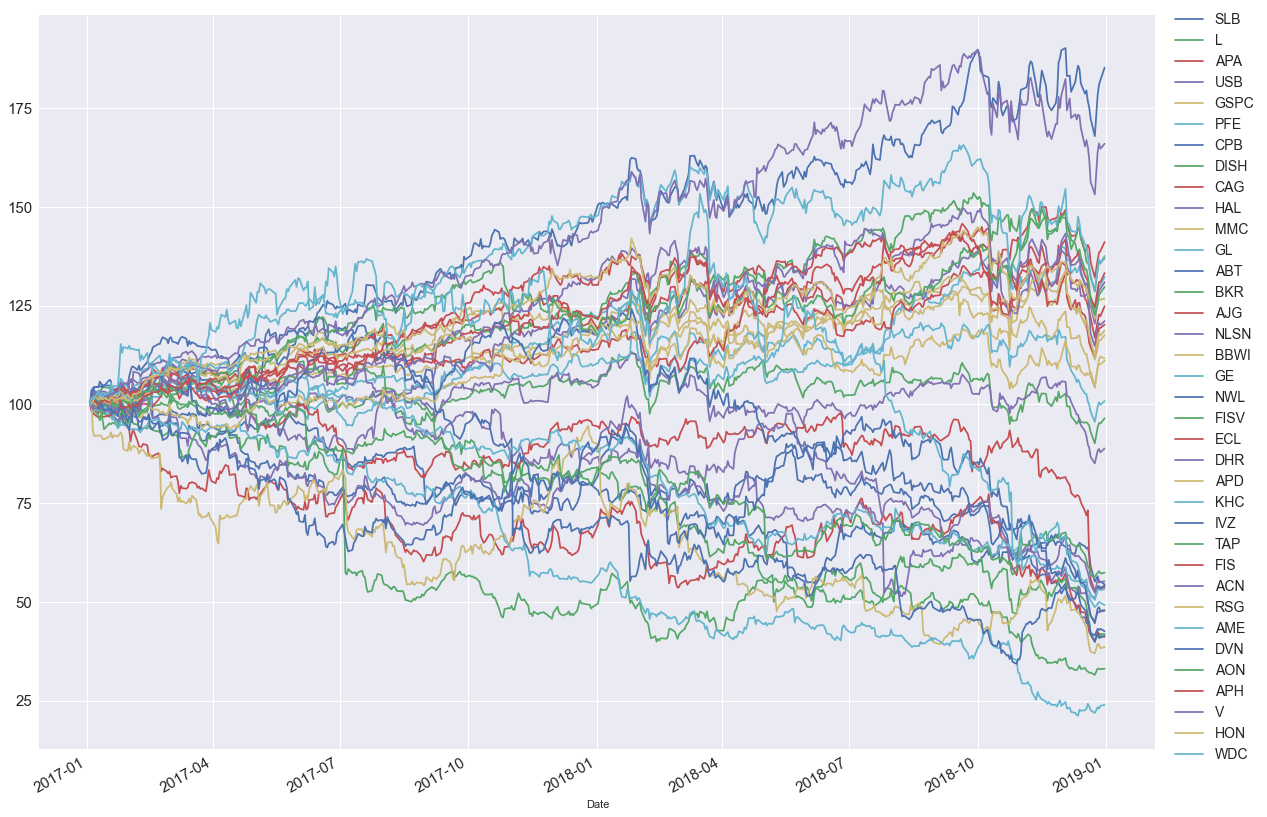

In [83]:
norm_track.plot(figsize = (20,15), fontsize = 15)
plt.legend(fontsize = 14, loc = 1, bbox_to_anchor=(0.5, 0.42, 0.6, 0.6))
plt.show()

In [84]:
e = tracking.sort_values('TE').index[1:noe+1]
p = tracking.sort_values('Premium').index[1:nop+1]
tracking_stocks = Union(e, p)
nos = len(tracking_stocks)
nos
#nos = the number of stocks in the tracking portfolio

34

## Tracking Portfolio

In [85]:
eq_weights = np.full(nos, 1/nos)
eq_weights

array([0.02941176, 0.02941176, 0.02941176, 0.02941176, 0.02941176,
       0.02941176, 0.02941176, 0.02941176, 0.02941176, 0.02941176,
       0.02941176, 0.02941176, 0.02941176, 0.02941176, 0.02941176,
       0.02941176, 0.02941176, 0.02941176, 0.02941176, 0.02941176,
       0.02941176, 0.02941176, 0.02941176, 0.02941176, 0.02941176,
       0.02941176, 0.02941176, 0.02941176, 0.02941176, 0.02941176,
       0.02941176, 0.02941176, 0.02941176, 0.02941176])

In [86]:
ret_t.loc[:, tracking_stocks]

SLB         L       APA       USB       PFE       CPB  \
Date                                                                     
2017-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-04  0.007429 -0.006356 -0.002979  0.007384  0.008788  0.006926   
2017-01-05 -0.001522 -0.007676 -0.005347 -0.016782  0.009613 -0.002129   
2017-01-06  0.013834  0.004512 -0.002055  0.006474 -0.003868 -0.003775   
2017-01-09 -0.008210 -0.009840 -0.012041 -0.004483 -0.000299 -0.015651   
...              ...       ...       ...       ...       ...       ...   
2018-12-24 -0.014286 -0.030317 -0.043314 -0.019054 -0.032912 -0.065175   
2018-12-26  0.040352  0.045134  0.064567  0.037249  0.040444  0.024835   
2018-12-27 -0.007648  0.011471 -0.011095  0.005728  0.015644 -0.021898   
2018-12-28  0.007432 -0.001334 -0.014959 -0.009639  0.002567 -0.001791   
2018-12-31 -0.014208  0.013583 -0.003417  0.010838  0.016061 -0.013457   

                DISH       CAG       BKR       HAL  ...       FIS       ACN  \
Date                                                ...                       
2017-01-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2017-01-04  0.011727 -0.016851 -0.004306  0.003772  ...  0.016368  0.002404   
2017-01-05  0.006127 -0.003581 -0.006178  0.005726  ... -0.002428 -0.014991   
2017-01-06  0.009875 -0.005392 -0.006061  0.008006  ...  0.010762  0.011392   
2017-01-09  0.004563 -0.007744 -0.011257 -0.010413  ... -0.010774 -0.011178   
...              ...       ...       ...       ...  ...       ...       ...   
2018-12-24 -0.041567 -0.053725 -0.018687 -0.027466  ... -0.020644 -0.025729   
2018-12-26  0.037948  0.022424  0.050781  0.051313  ...  0.037567  0.039949   
2018-12-27 -0.020490 -0.009799 -0.001859 -0.002648  ...  0.013980  0.010071   
2018-12-28  0.023790 -0.001885 -0.001862  0.003794  ... -0.000099 -0.004202   
2018-12-31  0.000401  0.008499  0.002798  0.004535  ...  0.017260  0.008511   

                 RSG       AME       DVN       AON       APH         V  \
Date                                                                     
2017-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-04  0.001758  0.011987  0.008921  0.010974  0.007415  0.008176   
2017-01-05  0.004213 -0.012648  0.031789  0.001500 -0.005300  0.011728   
2017-01-06 -0.003146  0.018097 -0.006937  0.007667  0.007548  0.013812   
2017-01-09 -0.010696 -0.008788 -0.042942 -0.008308 -0.010282 -0.005595   
...              ...       ...       ...       ...       ...       ...   
2018-12-24 -0.033538 -0.028523 -0.042446 -0.026973 -0.020965 -0.020361   
2018-12-26  0.032822  0.045777  0.082459  0.020736  0.042300  0.069827   
2018-12-27  0.007420  0.016000  0.008366  0.020244  0.019911  0.013668   
2018-12-28 -0.000417 -0.008617 -0.019214  0.003982  0.000622 -0.008105   
2018-12-31  0.002224  0.014536  0.003562  0.011552  0.006835  0.007637   

                 HON       WDC  
Date                            
2017-01-03       NaN       NaN  
2017-01-04  0.002754  0.015987  
2017-01-05  0.002232  0.000142  
2017-01-06  0.015159 -0.002410  
2017-01-09 -0.008268  0.021029  
...              ...       ...  
2018-12-24 -0.035615 -0.023398  
2018-12-26  0.037972  0.053337  
2018-12-27  0.015436 -0.001083  
2018-12-28 -0.006157 -0.004066  
2018-12-31  0.010401  0.006260  

[502 rows x 34 columns]

In [87]:
ret_t.loc[:, tracking_stocks].dot(eq_weights)

Date
2017-01-03         NaN
2017-01-04    0.007702
2017-01-05   -0.002603
2017-01-06    0.004420
2017-01-09   -0.007326
                ...   
2018-12-24   -0.030279
2018-12-26    0.043655
2018-12-27    0.005637
2018-12-28   -0.002342
2018-12-31    0.006793
Length: 502, dtype: float64

In [88]:
##calculate portfolio returns based on weights
def port_ret(weights):
    return ret_t.loc[:, tracking_stocks].dot(weights)

In [89]:
def tracking_error(weights):
    return port_ret(weights).sub(ret_t['GSPC']).std() * np.sqrt(252)

In [90]:
tracking_error(eq_weights)

0.05180465779284215

In [91]:
ew_port = port_ret(eq_weights)[1:].add(1).cumprod() * 100
ew_port

Date
2017-01-04    100.770200
2017-01-05    100.507859
2017-01-06    100.952068
2017-01-09    100.212455
2017-01-10     99.967307
                 ...    
2018-12-24     80.761455
2018-12-26     84.287088
2018-12-27     84.762193
2018-12-28     84.563719
2018-12-31     85.138138
Length: 501, dtype: float64

In [92]:
norm_track['EW_Port'] = ew_port
norm_track.iloc[0, -1] = 100
norm_track

SLB           L         APA         USB        GSPC  \
Date                                                                     
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000   
2017-01-04  100.742921   99.364408   99.702103  100.738440  100.572227   
2017-01-05  100.589623   98.601695   99.169020   99.047808  100.494719   
2017-01-06  101.981132   99.046609   98.965193   99.689079  100.848155   
2017-01-09  101.143860   98.072034   97.773600   99.242131  100.490286   
...                ...         ...         ...         ...         ...   
2018-12-24   41.497638   90.127119   39.824397   85.036920  104.130958   
2018-12-26   43.172169   94.194912   42.395738   88.204431  109.295202   
2018-12-27   42.841982   95.275425   41.925369   88.709682  110.231062   
2018-12-28   43.160374   95.148303   41.298214   87.854644  110.094201   
2018-12-31   42.547170   96.440677   41.157103   88.806843  111.029175   

                   PFE         CPB        DISH         CAG         HAL  ...  \
Date                                                                    ...   
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000  ...   
2017-01-04  100.878789  100.692615  101.172727   98.314894  100.377154  ...   
2017-01-05  101.848488  100.478234  101.792595   97.962783  100.951866  ...   
2017-01-06  101.454546  100.098947  102.797792   97.434616  101.760057  ...   
2017-01-09  101.424244   98.532323  103.266880   96.680081  100.700430  ...   
...                ...         ...         ...         ...         ...  ...   
2018-12-24  122.878785   55.112135   40.174234   52.716298   45.150861  ...   
2018-12-26  127.848481   56.480871   41.698777   53.898393   47.467673  ...   
2018-12-27  129.848483   55.244064   40.844362   53.370222   47.341955  ...   
2018-12-28  130.181822   55.145117   41.816049   53.269621   47.521550  ...   
2018-12-31  132.272728   54.403038   41.832803   53.722338   47.737069  ...   

                   ACN         RSG         AME         DVN         AON  \
Date                                                                     
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000   
2017-01-04  100.240425  100.175844  101.198700  100.892095  101.097427   
2017-01-05   98.737763  100.597855   99.918730  104.099398  101.249109   
2017-01-06   99.862617  100.281343  101.726937  103.377222  102.025336   
2017-01-09   98.746351   99.208720  100.832994   98.937978  101.177730   
...                ...         ...         ...         ...         ...   
2018-12-24  114.777605  121.610700  128.707836   44.562444  122.626695   
2018-12-26  119.362868  125.602254  134.599753   48.237040  125.169514   
2018-12-27  120.565005  126.534202  136.753344   48.640609  127.703428   
2018-12-28  120.058396  126.481452  135.574973   47.706028  128.211987   
2018-12-31  121.080195  126.762788  137.545704   47.875956  129.693075   

                   APH           V         HON         WDC     EW_Port  
Date                                                                    
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000  
2017-01-04  100.741510  100.817612  100.275440  101.598733  100.770200  
2017-01-05  100.207622  101.999995  100.499225  101.613139  100.507859  
2017-01-06  100.963965  103.408804  102.022725  101.368280  100.952068  
2017-01-09   99.925845  102.830189  101.179209  103.499928  100.212455  
...                ...         ...         ...         ...         ...  
2018-12-24  112.190421  153.119501  112.103318   50.496905   80.761455  
2018-12-26  116.936079  163.811315  116.360070   53.190264   84.287088  
2018-12-27  119.264419  166.050308  118.156165   53.132650   84.762193  
2018-12-28  119.338575  164.704406  117.428735   52.916609   84.563719  
2018-12-31  120.154228  165.962267  118.650081   53.247877   85.138138  

[502 rows x 37 columns]

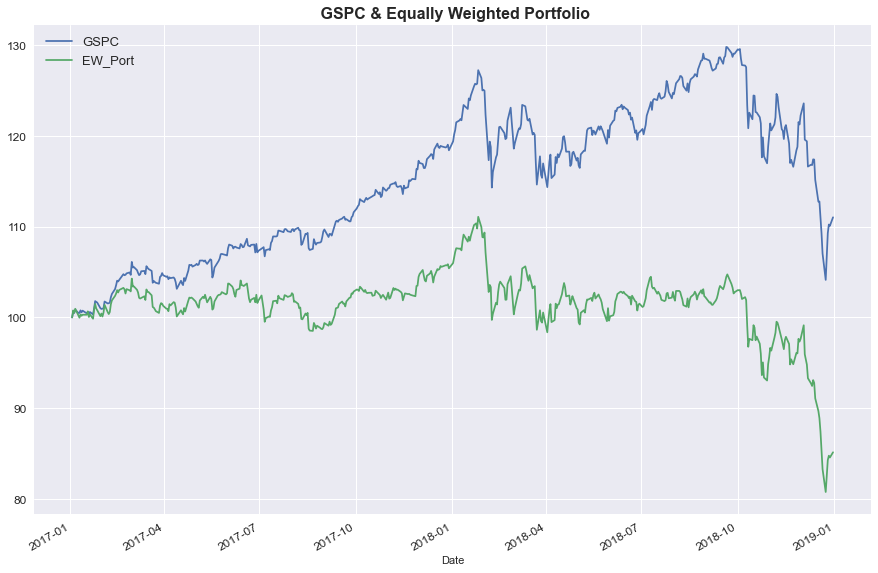

In [93]:

norm_track[['GSPC', 'EW_Port']].plot(figsize = (15,10), fontsize = 12)
plt.title(' GSPC & Equally Weighted Portfolio', fontdict = {'fontweight':'bold', 'fontsize':16})
plt.legend(fontsize = 13, loc = 2)   
plt.show()

## The Optimal Tracking Portfolio

In [94]:
import scipy.optimize as sco

In [95]:
constraints = ({'type':'eq', 'fun':lambda x: np.sum(x) - 1})
bounds = tuple((0,1) for x in range(nos))
opts = sco.minimize(tracking_error, eq_weights, method = 'SLSQP', bounds = bounds, constraints = constraints)   
opts

     fun: 0.03192213734517931
     jac: array([0.02164425, 0.01538334, 0.01537228, 0.0151408 , 0.01532252,
       0.01573591, 0.01478309, 0.01583594, 0.01512899, 0.01539819,
       0.02137789, 0.01571023, 0.01528131, 0.01516214, 0.01475894,
       0.01515157, 0.01552173, 0.01531226, 0.01531228, 0.01533584,
       0.01521055, 0.01543901, 0.01516496, 0.01987974, 0.01523365,
       0.01532399, 0.01537456, 0.01538624, 0.01533667, 0.02141961,
       0.01529633, 0.01534619, 0.015159  , 0.01509996])
 message: 'Optimization terminated successfully'
    nfev: 460
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([8.22780688e-19, 2.22883989e-02, 1.69615442e-02, 7.25875877e-02,
       6.59635032e-02, 9.45995628e-03, 2.27347173e-03, 0.00000000e+00,
       1.07851259e-02, 1.39826086e-02, 1.54857013e-18, 3.03154183e-02,
       7.23528799e-02, 9.26472622e-03, 2.47400214e-02, 6.75975373e-03,
       1.68443956e-02, 3.15457594e-02, 3.27084367e-02, 4.03089720e-02,
       2.81042587e-02

In [96]:
optimal_weights = opts['x']
optimal_weights

array([8.22780688e-19, 2.22883989e-02, 1.69615442e-02, 7.25875877e-02,
       6.59635032e-02, 9.45995628e-03, 2.27347173e-03, 0.00000000e+00,
       1.07851259e-02, 1.39826086e-02, 1.54857013e-18, 3.03154183e-02,
       7.23528799e-02, 9.26472622e-03, 2.47400214e-02, 6.75975373e-03,
       1.68443956e-02, 3.15457594e-02, 3.27084367e-02, 4.03089720e-02,
       2.81042587e-02, 3.66143455e-02, 1.53687428e-02, 0.00000000e+00,
       4.21608162e-02, 4.73156486e-02, 2.82910572e-02, 2.02689857e-02,
       1.49363305e-02, 0.00000000e+00, 5.70751086e-02, 1.54009496e-01,
       5.18698450e-02, 2.48428059e-02])

In [97]:
optimal_weights.sum()

1.0

In [98]:
pd.Series(index = tracking_stocks, data = optimal_weights)

SLB     8.227807e-19
L       2.228840e-02
APA     1.696154e-02
USB     7.258759e-02
PFE     6.596350e-02
CPB     9.459956e-03
DISH    2.273472e-03
CAG     0.000000e+00
BKR     1.078513e-02
HAL     1.398261e-02
MMC     1.548570e-18
GL      3.031542e-02
ABT     7.235288e-02
AJG     9.264726e-03
NLSN    2.474002e-02
BBWI    6.759754e-03
NWL     1.684440e-02
FISV    3.154576e-02
ECL     3.270844e-02
DHR     4.030897e-02
APD     2.810426e-02
KHC     3.661435e-02
IVZ     1.536874e-02
TAP     0.000000e+00
FIS     4.216082e-02
ACN     4.731565e-02
RSG     2.829106e-02
AME     2.026899e-02
DVN     1.493633e-02
AON     0.000000e+00
APH     5.707511e-02
V       1.540095e-01
HON     5.186985e-02
WDC     2.484281e-02
dtype: float64

In [99]:
opt_port = port_ret(optimal_weights)[1:].add(1).cumprod() * 100
opt_port

Date
2017-01-04    100.757492
2017-01-05    100.758658
2017-01-06    101.532049
2017-01-09    100.958069
2017-01-10    100.922759
                 ...    
2018-12-24    104.301675
2018-12-26    109.350190
2018-12-27    110.484101
2018-12-28    110.150647
2018-12-31    111.131819
Length: 501, dtype: float64

In [100]:
norm_track['Opt_Port'] = opt_port
norm_track.iloc[0, -1] = 100
norm_track

SLB           L         APA         USB        GSPC  \
Date                                                                     
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000   
2017-01-04  100.742921   99.364408   99.702103  100.738440  100.572227   
2017-01-05  100.589623   98.601695   99.169020   99.047808  100.494719   
2017-01-06  101.981132   99.046609   98.965193   99.689079  100.848155   
2017-01-09  101.143860   98.072034   97.773600   99.242131  100.490286   
...                ...         ...         ...         ...         ...   
2018-12-24   41.497638   90.127119   39.824397   85.036920  104.130958   
2018-12-26   43.172169   94.194912   42.395738   88.204431  109.295202   
2018-12-27   42.841982   95.275425   41.925369   88.709682  110.231062   
2018-12-28   43.160374   95.148303   41.298214   87.854644  110.094201   
2018-12-31   42.547170   96.440677   41.157103   88.806843  111.029175   

                   PFE         CPB        DISH         CAG         HAL  ...  \
Date                                                                    ...   
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000  ...   
2017-01-04  100.878789  100.692615  101.172727   98.314894  100.377154  ...   
2017-01-05  101.848488  100.478234  101.792595   97.962783  100.951866  ...   
2017-01-06  101.454546  100.098947  102.797792   97.434616  101.760057  ...   
2017-01-09  101.424244   98.532323  103.266880   96.680081  100.700430  ...   
...                ...         ...         ...         ...         ...  ...   
2018-12-24  122.878785   55.112135   40.174234   52.716298   45.150861  ...   
2018-12-26  127.848481   56.480871   41.698777   53.898393   47.467673  ...   
2018-12-27  129.848483   55.244064   40.844362   53.370222   47.341955  ...   
2018-12-28  130.181822   55.145117   41.816049   53.269621   47.521550  ...   
2018-12-31  132.272728   54.403038   41.832803   53.722338   47.737069  ...   

                   RSG         AME         DVN         AON         APH  \
Date                                                                     
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000   
2017-01-04  100.175844  101.198700  100.892095  101.097427  100.741510   
2017-01-05  100.597855   99.918730  104.099398  101.249109  100.207622   
2017-01-06  100.281343  101.726937  103.377222  102.025336  100.963965   
2017-01-09   99.208720  100.832994   98.937978  101.177730   99.925845   
...                ...         ...         ...         ...         ...   
2018-12-24  121.610700  128.707836   44.562444  122.626695  112.190421   
2018-12-26  125.602254  134.599753   48.237040  125.169514  116.936079   
2018-12-27  126.534202  136.753344   48.640609  127.703428  119.264419   
2018-12-28  126.481452  135.574973   47.706028  128.211987  119.338575   
2018-12-31  126.762788  137.545704   47.875956  129.693075  120.154228   

                     V         HON         WDC     EW_Port    Opt_Port  
Date                                                                    
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000  
2017-01-04  100.817612  100.275440  101.598733  100.770200  100.757492  
2017-01-05  101.999995  100.499225  101.613139  100.507859  100.758658  
2017-01-06  103.408804  102.022725  101.368280  100.952068  101.532049  
2017-01-09  102.830189  101.179209  103.499928  100.212455  100.958069  
...                ...         ...         ...         ...         ...  
2018-12-24  153.119501  112.103318   50.496905   80.761455  104.301675  
2018-12-26  163.811315  116.360070   53.190264   84.287088  109.350190  
2018-12-27  166.050308  118.156165   53.132650   84.762193  110.484101  
2018-12-28  164.704406  117.428735   52.916609   84.563719  110.150647  
2018-12-31  165.962267  118.650081   53.247877   85.138138  111.131819  

[502 rows x 38 columns]

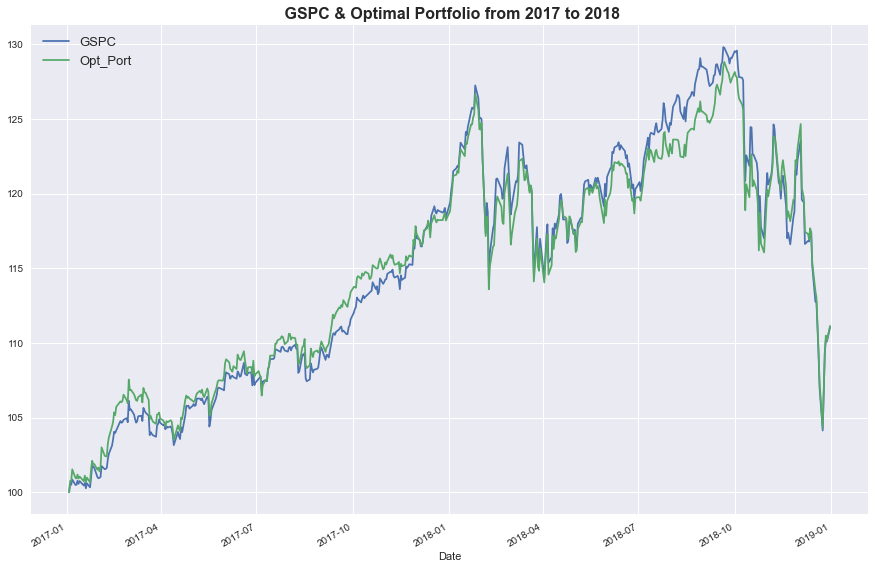

In [101]:
norm_track[['GSPC', 'Opt_Port']].plot(figsize = (15, 10))
plt.title(' GSPC & Optimal Portfolio from 2017 to 2018', fontdict = {'fontweight':'bold', 'fontsize':16})
plt.legend(fontsize = 13, loc = 2)
plt.show()

In [102]:
ann_rr(norm_track[['Opt_Port', 'EW_Port', 'GSPC']].pct_change())

Annualized Return  Annualized Risk
Opt_Port           0.061486         0.129433
EW_Port           -0.072682         0.128201
GSPC               0.061038         0.129582

## Forward Testing Optimal Portfolio

In [103]:
df

GSPC          A        AAL         AAP       AAPL  \
Date                                                                   
2017-01-03  2257.830078  46.490002  46.299999  170.600006  29.037500   
2017-01-04  2270.750000  47.099998  46.700001  172.000000  29.004999   
2017-01-05  2269.000000  46.540001  45.889999  171.880005  29.152500   
2017-01-06  2276.979980  47.990002  46.209999  169.630005  29.477501   
2017-01-09  2268.899902  48.139999  47.080002  169.529999  29.747499   
...                 ...        ...        ...         ...        ...   
2019-12-24  3223.379883  85.300003  29.180000  160.570007  71.067497   
2019-12-26  3239.909912  85.449997  29.670000  159.270004  72.477501   
2019-12-27  3240.020020  85.419998  28.440001  158.350006  72.449997   
2019-12-30  3221.290039  84.900002  28.299999  159.119995  72.879997   
2019-12-31  3230.780029  85.309998  28.680000  160.160004  73.412498   

                 ABBV        ABC        ABMD        ABT         ACN  ...  \
Date                                                                 ...   
2017-01-03  62.410000  82.610001  112.360001  39.049999  116.459999  ...   
2017-01-04  63.290001  84.660004  115.739998  39.360001  116.739998  ...   
2017-01-05  63.770000  83.680000  114.809998  39.700001  114.989998  ...   
2017-01-06  63.790001  84.800003  115.419998  40.779999  116.300003  ...   
2017-01-09  64.209999  85.480003  117.110001  40.740002  115.000000  ...   
...               ...        ...         ...        ...         ...  ...   
2019-12-24  89.849998  85.419998  172.300003  87.279999  211.610001  ...   
2019-12-26  89.830002  85.050003  171.009995  87.279999  212.050003  ...   
2019-12-27  89.199997  84.910004  169.270004  87.400002  212.220001  ...   
2019-12-30  88.519997  83.639999  167.289993  86.800003  210.639999  ...   
2019-12-31  88.540001  85.019997  170.589996  86.860001  210.570007  ...   

                  WYNN        XEL       XLNX        XOM       XRAY        XYL  \
Date                                                                            
2017-01-03   87.459999  40.619999  59.070000  90.889999  58.619999  49.650002   
2017-01-04   90.279999  40.799999  58.639999  89.889999  59.099998  50.389999   
2017-01-05   91.440002  40.799999  57.930000  88.550003  58.330002  49.930000   
2017-01-06   92.430000  40.919998  59.049999  88.500000  58.290001  49.580002   
2017-01-09   92.750000  40.299999  59.060001  87.040001  58.470001  49.369999   
...                ...        ...        ...        ...        ...        ...   
2019-12-24  139.440002  62.860001  98.489998  70.019997  57.209999  78.639999   
2019-12-26  140.940002  62.790001  98.680000  70.129997  56.529999  78.599998   
2019-12-27  139.809998  63.119999  98.419998  69.889999  56.840000  78.839996   
2019-12-30  139.380005  63.290001  97.680000  69.480003  56.400002  78.739998   
2019-12-31  138.869995  63.490002  97.769997  69.779999  56.590000  78.790001   

                   YUM         ZBH       ZION         ZTS  
Date                                                       
2017-01-03   63.209999  103.330002  43.180000   53.590000  
2017-01-04   63.439999  104.279999  43.799999   54.110001  
2017-01-05   63.650002  104.949997  43.090000   53.930000  
2017-01-06   64.419998  104.959999  43.369999   54.099998  
2017-01-09   64.599998  107.000000  42.900002   53.950001  
...                ...         ...        ...         ...  
2019-12-24  100.330002  150.869995  51.529999  132.919998  
2019-12-26  101.790001  150.300003  51.660000  133.029999  
2019-12-27  101.900002  150.009995  51.500000  133.250000  
2019-12-30  100.639999  148.750000  51.770000  132.210007  
2019-12-31  100.730003  149.679993  51.919998  132.350006  

[754 rows x 459 columns]

In [104]:
ret

GSPC         A       AAL       AAP      AAPL      ABBV  \
Date                                                                     
2017-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-04  0.005722  0.013121  0.008639  0.008206 -0.001119  0.014100   
2017-01-05 -0.000771 -0.011890 -0.017345 -0.000698  0.005085  0.007584   
2017-01-06  0.003517  0.031156  0.006973 -0.013091  0.011148  0.000314   
2017-01-09 -0.003549  0.003126  0.018827 -0.000590  0.009159  0.006584   
...              ...       ...       ...       ...       ...       ...   
2019-12-24 -0.000195  0.000469 -0.004096  0.003751  0.000951 -0.004432   
2019-12-26  0.005128  0.001758  0.016792 -0.008096  0.019840 -0.000223   
2019-12-27  0.000034 -0.000351 -0.041456 -0.005776 -0.000379 -0.007013   
2019-12-30 -0.005781 -0.006088 -0.004923  0.004863  0.005935 -0.007623   
2019-12-31  0.002946  0.004829  0.013428  0.006536  0.007307  0.000226   

                 ABC      ABMD       ABT       ACN  ...      WYNN       XEL  \
Date                                                ...                       
2017-01-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2017-01-04  0.024815  0.030082  0.007939  0.002404  ...  0.032243  0.004431   
2017-01-05 -0.011576 -0.008035  0.008638 -0.014991  ...  0.012849  0.000000   
2017-01-06  0.013384  0.005313  0.027204  0.011392  ...  0.010827  0.002941   
2017-01-09  0.008019  0.014642 -0.000981 -0.011178  ...  0.003462 -0.015151   
...              ...       ...       ...       ...  ...       ...       ...   
2019-12-24 -0.002103  0.010913 -0.000801  0.003700  ... -0.005634 -0.002539   
2019-12-26 -0.004331 -0.007487  0.000000  0.002079  ...  0.010757 -0.001114   
2019-12-27 -0.001646 -0.010175  0.001375  0.000802  ... -0.008018  0.005256   
2019-12-30 -0.014957 -0.011697 -0.006865 -0.007445  ... -0.003076  0.002693   
2019-12-31  0.016499  0.019726  0.000691 -0.000332  ... -0.003659  0.003160   

                XLNX       XOM      XRAY       XYL       YUM       ZBH  \
Date                                                                     
2017-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-04 -0.007280 -0.011002  0.008188  0.014904  0.003639  0.009194   
2017-01-05 -0.012108 -0.014907 -0.013029 -0.009129  0.003310  0.006425   
2017-01-06  0.019334 -0.000565 -0.000686 -0.007010  0.012097  0.000095   
2017-01-09  0.000169 -0.016497  0.003088 -0.004236  0.002794  0.019436   
...              ...       ...       ...       ...       ...       ...   
2019-12-24 -0.004146 -0.003841  0.000525 -0.003927  0.005210 -0.002447   
2019-12-26  0.001929  0.001571 -0.011886 -0.000509  0.014552 -0.003778   
2019-12-27 -0.002635 -0.003422  0.005484  0.003053  0.001081 -0.001930   
2019-12-30 -0.007519 -0.005866 -0.007741 -0.001268 -0.012365 -0.008399   
2019-12-31  0.000921  0.004318  0.003369  0.000635  0.000894  0.006252   

                ZION       ZTS  
Date                            
2017-01-03       NaN       NaN  
2017-01-04  0.014358  0.009703  
2017-01-05 -0.016210 -0.003327  
2017-01-06  0.006498  0.003152  
2017-01-09 -0.010837 -0.002773  
...              ...       ...  
2019-12-24  0.003701  0.004155  
2019-12-26  0.002523  0.000828  
2019-12-27 -0.003097  0.001654  
2019-12-30  0.005243 -0.007805  
2019-12-31  0.002897  0.001059  

[754 rows x 459 columns]

In [105]:
tracking_stocks

['SLB',
 'L',
 'APA',
 'USB',
 'PFE',
 'CPB',
 'DISH',
 'CAG',
 'BKR',
 'HAL',
 'MMC',
 'GL',
 'ABT',
 'AJG',
 'NLSN',
 'BBWI',
 'NWL',
 'FISV',
 'ECL',
 'DHR',
 'APD',
 'KHC',
 'IVZ',
 'TAP',
 'FIS',
 'ACN',
 'RSG',
 'AME',
 'DVN',
 'AON',
 'APH',
 'V',
 'HON',
 'WDC']

In [106]:
def tracking_error_gen(data, tracking_stocks, weights, index, start, end):
    return data.loc[start:end, tracking_stocks].dot(weights).sub(ret.loc[start:end, index]).std() * np.sqrt(252)   

In [107]:
train_te = tracking_error_gen(ret, tracking_stocks, optimal_weights, 'GSPC', '2017-01-01', '2018-12-31')
train_te

0.03192213734517931

In [108]:
forward_te = tracking_error_gen(ret, tracking_stocks, optimal_weights, 'GSPC', '2019-01-01', '2019-12-31')
forward_te

0.03998810176071781

In [109]:
GSPC = ret.loc['2019-01-01':'2019-12-31', 'GSPC'].add(1).cumprod() * 100
GSPC

Date
2019-01-02    100.126850
2019-01-03     97.648036
2019-01-04    101.000851
2019-01-07    101.708911
2019-01-08    102.695008
                 ...    
2019-12-24    128.582873
2019-12-26    129.242268
2019-12-27    129.246660
2019-12-30    128.499508
2019-12-31    128.878070
Name: GSPC, Length: 252, dtype: float64

In [110]:
Opt_Portf = ret.loc['2019-01-01':'2019-12-31', tracking_stocks].dot(optimal_weights).add(1).cumprod() * 100

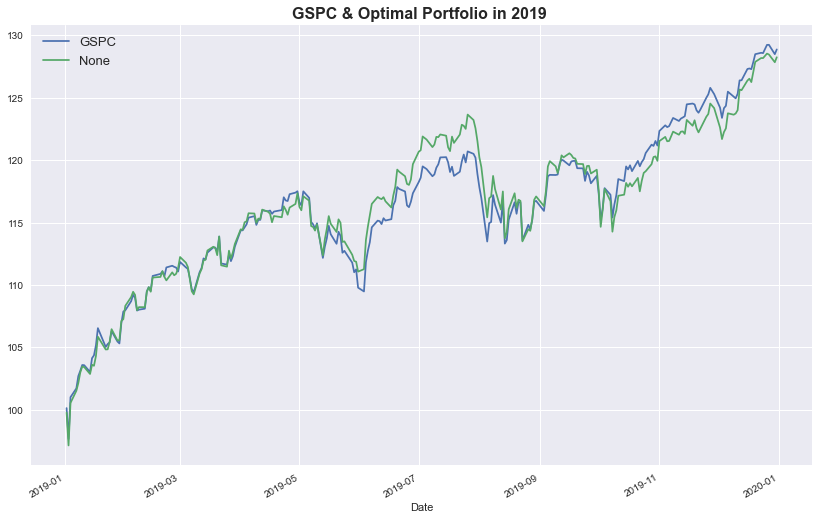

In [111]:
plt.figure(figsize = (14,9))
GSPC.plot()
Opt_Portf.plot()
Opt_Portf.name = 'Opt_Port'
plt.title('GSPC & Optimal Portfolio in 2019 ', fontdict = {'fontweight':'bold', 'fontsize':16})
plt.legend(fontsize = 13, loc = 2)
plt.show()

##  Performance Measurement via Random Portfolios

In [112]:
bucket = df.columns.drop(['GSPC'])
bucket

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE',
       ...
       'WYNN', 'XEL', 'XLNX', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZION',
       'ZTS'],
      dtype='object', length=458)

In [113]:
np.random.choice(bucket, size = nos, replace = False)

array(['EXC', 'WLTW', 'SPG', 'XYL', 'LW', 'CTXS', 'PNR', 'PFG', 'PEG',
       'ESS', 'GE', 'FE', 'IT', 'AIZ', 'IFF', 'ALLE', 'WAT', 'MCHP', 'RE',
       'CDNS', 'NI', 'ICE', 'MDT', 'FBHS', 'GS', 'CTRA', 'HCA', 'REG',
       'CI', 'UHS', 'SBUX', 'VFC', 'GIS', 'ITW'], dtype=object)

In [114]:
random_numbers = np.random.random(nos)
random_weights = random_numbers / random_numbers.sum()

In [115]:
np.random.seed(123)
random_stocks = np.random.choice(bucket, size = nos, replace = False)
random_numbers = np.random.random(nos)
random_weights = random_numbers / random_numbers.sum()

In [116]:
print(random_stocks, random_weights)

['AWK' 'CHRW' 'ANET' 'XYL' 'JCI' 'TGT' 'CSX' 'CME' 'WAT' 'ADM' 'IFF' 'MU'
 'TRV' 'CBOE' 'SPGI' 'PSX' 'CAH' 'DRI' 'WBA' 'VMC' 'REG' 'ALK' 'AEP' 'MHK'
 'WYNN' 'STZ' 'COP' 'BR' 'ADSK' 'TROW' 'ANTM' 'LRCX' 'AMZN' 'HAS'] [0.02822754 0.02868664 0.03185613 0.04602535 0.01928211 0.05010088
 0.02201146 0.02142422 0.0221133  0.00571664 0.02561295 0.03562577
 0.01636483 0.04905369 0.02630801 0.01552205 0.02300798 0.02286267
 0.04240034 0.04056667 0.02601423 0.0275903  0.0459382  0.03957321
 0.02806829 0.04092859 0.01837773 0.02979315 0.03188664 0.00398132
 0.03734996 0.03959939 0.03037096 0.02775882]


In [117]:
forward_te

0.03998810176071781

In [118]:
random_te = tracking_error_gen(ret, random_stocks, random_weights, 'GSPC', '2019-01-01', '2019-12-31')
random_te

0.04818313987635434

In [119]:
Random_Port = ret.loc['2019-01-01':'2019-12-31', random_stocks].dot(random_weights).add(1).cumprod() * 100

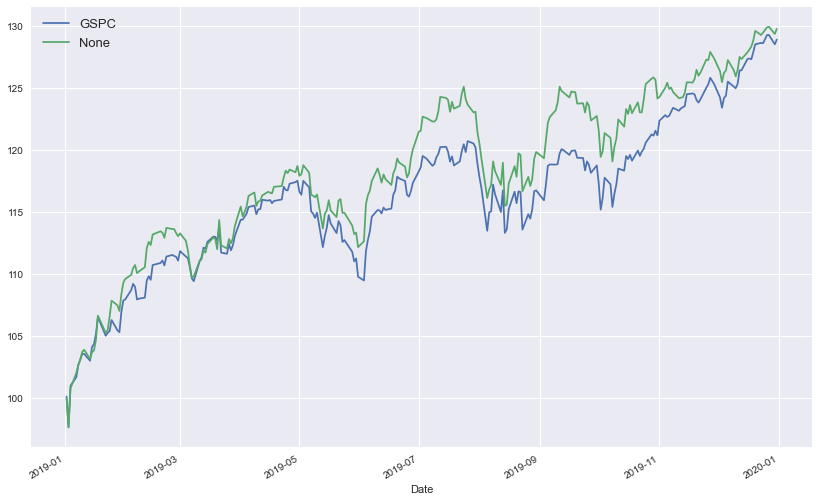

In [120]:
plt.figure(figsize = (14,9))
GSPC.plot()
Random_Port.plot()
Random_Port.name = 'Random_Port'
plt.legend(fontsize = 13, loc = 2)
plt.show()

In [121]:
test = np.empty(100000)
np.random.seed(123)
for i in range(100000):
    random_numbers = np.random.random(nos)
    random_weights = random_numbers / random_numbers.sum()
    random_stocks = np.random.choice(bucket, size = nos, replace = False)
       
    test[i] = tracking_error_gen(ret, random_stocks, random_weights, 'GSPC', '2019-01-01', '2019-12-31')

In [122]:
(test < forward_te)

array([False, False, False, ..., False, False, False])

In [123]:
(test < forward_te).mean()

0.02227

__Only 2 percent of 100,000 random portfolios outperform our optimal portfolio.__

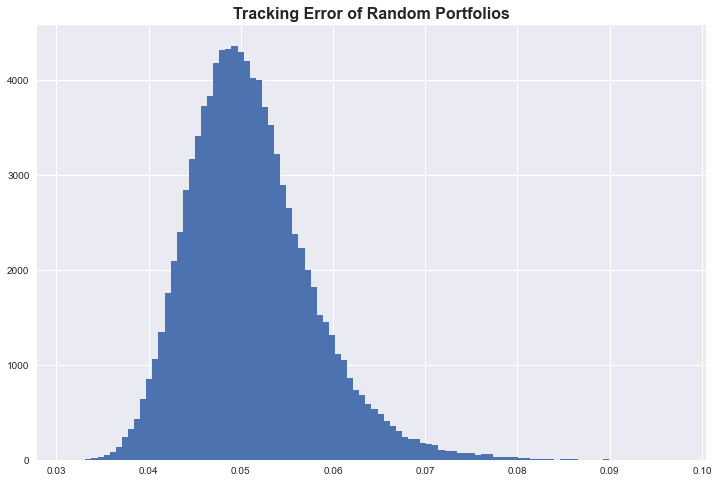

In [124]:
plt.figure(figsize = (12, 8))
plt.hist(test, bins = 100)  
plt.title('Tracking Error of Random Portfolios', fontdict = {'fontweight':'bold', 'fontsize':16})
plt.show()